# Evaluating Argument Quality with Human Experts and LLM Judges: A Comparative Study of Gemma, LLaMA, and DeepSeek Using Prompt Engineering:

## This Colab notebook compares human expert evaluations and LLM-based judgments of arguments generated by Gemma, LLaMA, and DeepSeek, using zero-shot and one-shot prompt settings.

### By: Gabriela A. Díaz


## Results Second Round - Expert

In [44]:
import pandas as pd

## colors

In [3]:
#colors
#G3 palette=['#ffac37','#ffc575']
color_G3_0shot = '#ffac37'
color_G3_1shot = '#ffc575'
# LL '#009e73','#0bd9a1'
color_LL_0shot = '#009e73'
color_LL_1shot = '#0bd9a1'
# DS '#0077bb','#60b8eb'
color_DS_0shot = '#0077bb'
color_DS_1shot = '#60b8eb'


### SecondRound - expert

In [92]:
R2_f1 = pd.read_csv('form_2round1 (Responses) - Form Responses 1.csv') 
R2_f2 = pd.read_csv('form_2round2 (Responses) - Form Responses 1.csv') 
R2_f3 = pd.read_csv('form_2round3 (Responses) - Form Responses 1.csv') 
R2_f4 = pd.read_csv('form_2round4 (Responses) - Form Responses 1.csv') 
R2_f5 = pd.read_csv('form_2round5 (Responses) - Form Responses 1.csv') 
R2_f6 = pd.read_csv('form_2round6 (Responses) - Form Responses 1.csv') 


R2_f7 = pd.read_csv('form_2round7 (Responses) - Form Responses 1.csv') 
R2_f8 = pd.read_csv('form_2round8 (Responses) - Form Responses 1.csv') 
R2_f9 = pd.read_csv('form_2round9 (Responses) - Form Responses 1.csv') 


In [88]:
R2_f1

,Timestamp,Email Address,"Argument 1: It is observed that significant revenues are predicted to be generated through a carbon tax rebate. The impact of this rebate is being presented as a benefit to Canadians, with claims being made that a greater return is anticipated than the costs incurred. Concerns are being voiced regarding the potential for undue influence and scare tactics in the framing of this issue. The matter of worker burdens and unnecessary costs are being highlighted. It is suggested that a significant portion of the public are being targeted with messaging designed to elicit a particular response. The issue of costs to workers are being presented as a key element in the debate.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n",Comments for Argument 1:,"Argument 2: It is observed that a climate change tax rebate is being presented as a benefit, while simultaneously being viewed as a burden by many Canadians. Revenues from the rebate are predicted to reach $2.6 billion, and it is suggested that most Canadians will receive more from the rebate than they pay in carbon tax. Concerns are being raised that the rebate is being used as a tactic of fear mongering and that it represents an unnecessary burden on workers. It is suggested that the rebate is being strategically deployed to influence voter sentiment, and that the situation warrants careful consideration.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n",Comments for Argument 2:,"If you can rephrase a better argument based on the three opinions, write it here:","Argument 1: It is suggested that significant fluctuations in global temperatures have been observed, and these are frequently attributed to human activity. However, it is noted that natural climate variability has historically played a substantial role in shaping Earth’s climate system. Observations are made that long-term trends are often obscured by short-term, cyclical changes. Furthermore, the complexities of the climate system are frequently misrepresented, and the influence of natural processes is often downplayed. It is suggested that the narrative surrounding human impact is frequently shaped by specific agendas, and that a more holistic understanding of the planet’s climate is consistently challenged.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n",Comments for Argument 1: .1,"Argument 2: Persistent claims of global warming have been repeatedly challenged by observations of atmospheric vaporizations and fluctuations in temperature. Suggestions of a warming trend have been met with skepticism, and assertions regarding the cause of these changes have been questioned. The validity of these claims has been contested, and the pursuit of alternative explanations has been actively promoted. The notion of a singular, human-driven cause for these phenomena has been subjected to scrutiny, and the possibility of other influences has been repeatedly raised.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n",...,"Argument 1: It is suggested that significant shifts in the global climate have been observed, and considerable attention has been directed towards potential human influences. It is noted that a different outcome in the 2000 election would have been proposed, and it is argued that a proactive approach to addressing climate change would have been initiated decades earlier. The consequences of a different political landscape are presented as a factor in the current situation, and it is implied that a different course of action would have altered the trajectory of global warming.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n",Comments for Argument 1: .7,"Argument 2: Significant shifts in global climate patterns have been suggested, and a substantial timeline for addressing climate change has been proposed. The consequences of a different outcome in the 2000 election have been highlighted, with a projected twenty-year advancement i

In [61]:
# row 0 for test
# Drop row 0 and modify the DataFrame in place
R2_f1.drop(0, inplace=True)
R2_f1.reset_index(inplace=True)
R2_f1 = R2_f1.loc[:, ~R2_f1.columns.str.startswith('Comments')]
R2_f1 = R2_f1.loc[:, ~R2_f1.columns.str.startswith('If you can rephrase')]
R2_f1 = R2_f1.drop(['Email Address','Timestamp'],axis=1)

R2_f2 = R2_f2.loc[:, ~R2_f2.columns.str.startswith('Comments')]
R2_f2 = R2_f2.loc[:, ~R2_f2.columns.str.startswith('If you can rephrase')]
R2_f2 = R2_f2.drop(['Email Address','Timestamp'],axis=1)

R2_f3 = R2_f3.loc[:, ~R2_f3.columns.str.startswith('Comments')]
R2_f3 = R2_f3.loc[:, ~R2_f3.columns.str.startswith('If you can rephrase')]
R2_f3 = R2_f3.drop(['Email Address','Timestamp'],axis=1)

R2_f4 = R2_f4.loc[:, ~R2_f4.columns.str.startswith('Comments')]
R2_f4 = R2_f4.loc[:, ~R2_f4.columns.str.startswith('If you can rephrase')]
R2_f4 = R2_f4.drop(['Email Address','Timestamp'],axis=1)

R2_f5 = R2_f5.loc[:, ~R2_f5.columns.str.startswith('Comments')]
R2_f5 = R2_f5.loc[:, ~R2_f5.columns.str.startswith('If you can rephrase')]
R2_f5 = R2_f5.drop(['Email Address','Timestamp'],axis=1)

R2_f6 = R2_f6.loc[:, ~R2_f6.columns.str.startswith('Comments')]
R2_f6 = R2_f6.loc[:, ~R2_f6.columns.str.startswith('If you can rephrase')]
R2_f6 = R2_f6.drop(['Email Address','Timestamp'],axis=1)


In [87]:

R2_f1 = R2_f1.drop('index', axis=1)


In [93]:
def clean_df(df,drop=False):
    # row 0 for test
    # Drop row 0 and modify the DataFrame in place
    if (drop): 
        df.drop(0, inplace=True)
        df.reset_index(inplace=True)
        df = df.drop('index', axis=1)
    df = df.loc[:, ~df.columns.str.startswith('Comments')]
    df = df.loc[:, ~df.columns.str.startswith('If you can rephrase')]
    df = df.drop(['Email Address','Timestamp'],axis=1)
    return df

#R2_f1.drop(0, inplace=True)
R2_f1 = clean_df(R2_f1,True)
R2_f2 = clean_df(R2_f2)
R2_f3 = clean_df(R2_f3)
R2_f4 = clean_df(R2_f4)
R2_f5 = clean_df(R2_f5)
R2_f6 = clean_df(R2_f6)

R2_f7 = clean_df(R2_f7)
R2_f8 = clean_df(R2_f8)
R2_f9 = clean_df(R2_f9)

In [70]:
R2_f1.T

""
index
"Argument 1: It is observed that significant revenues are predicted to be generated through a carbon tax rebate. The impact of this rebate is being presented as a benefit to Canadians, with claims being made that a greater return is anticipated than the costs incurred. Concerns are being voiced regarding the potential for undue influence and scare tactics in the framing of this issue. The matter of worker burdens and unnecessary costs are being highlighted. It is suggested that a significant portion of the public are being targeted with messaging designed to elicit a particular response. The issue of costs to workers are being presented as a key element in the debate.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n"
"Argument 2: It is observed that a climate change tax rebate is being presented as a benefit, while simultaneously being viewed as a burden by many Canadians. Revenues from the rebate are predicted to reach $2.6 billion, and it is suggested that most Canadians will receive more from the rebate than they pay in carbon tax. Concerns are being raised that the rebate is being used as a tactic of fear mongering and that it represents an unnecessary burden on workers. It is suggested that the rebate is being strategically deployed to influence voter sentiment, and that the situation warrants careful consideration.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n"
"Argument 1: It is suggested that significant fluctuations in global temperatures have been observed, and these are frequently attributed to human activity. However, it is noted that natural climate variability has historically played a substantial role in shaping Earth’s climate system. Observations are made that long-term trends are often obscured by short-term, cyclical changes. Furthermore, the complexities of the climate system are frequently misrepresented, and the influence of natural processes is often downplayed. It is suggested that the narrative surrounding human impact is frequently shaped by specific agendas, and that a more holistic understanding of the planet’s climate is consistently challenged.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n"
"Argument 2: Persistent claims of global warming have been repeatedly challenged by observations of atmospheric vaporizations and fluctuations in temperature. Suggestions of a warming trend have been met with skepticism, and assertions regarding the cause of these changes have been questioned. The validity of these claims has been contested, and the pursuit of alternative explanations has been actively promoted. The notion of a singular, human-driven cause for these phenomena has been subjected to scrutiny, and the possibility of other influences has been repeatedly raised.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n"
"Argument 1: Significant increases in extreme weather events, including widespread flooding, are being observed globally. Records of inundation, dating back to the 17th century and extending to recent events like the flooding in Quebec and Montreal, are being documented. Alterations to riverbeds and the utilization of flood plains for development are being noted. Increased frequency and intensity of these events are being recognized, suggesting a heightened vulnerability of established infrastructure and settlements to natural forces. Changes in water levels are being monitored and attributed to a complex interplay of factors, with heightened concern regarding the potential for more frequent and severe occurrences.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n"
"Argument 2: Increasingly frequent and severe flooding events, such as those experienced in Quebec and Montreal, are being observed. Historical records demonstrate that such events have persisted since the 17th century, with flood levels reaching up to three feet in Old Montreal. The expansion of settlements into flood plains and the alteration of r

In [94]:
df_all = pd.concat([R2_f1,R2_f2,R2_f3,R2_f4,R2_f5,R2_f6,R2_f7,R2_f8,R2_f9],axis=1) 

In [96]:
df_all.T

,0
"Argument 1: It is observed that significant revenues are predicted to be generated through a carbon tax rebate. The impact of this rebate is being presented as a benefit to Canadians, with claims being made that a greater return is anticipated than the costs incurred. Concerns are being voiced regarding the potential for undue influence and scare tactics in the framing of this issue. The matter of worker burdens and unnecessary costs are being highlighted. It is suggested that a significant portion of the public are being targeted with messaging designed to elicit a particular response. The issue of costs to workers are being presented as a key element in the debate.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n",4.0
"Argument 2: It is observed that a climate change tax rebate is being presented as a benefit, while simultaneously being viewed as a burden by many Canadians. Revenues from the rebate are predicted to reach $2.6 billion, and it is suggested that most Canadians will receive more from the rebate than they pay in carbon tax. Concerns are being raised that the rebate is being used as a tactic of fear mongering and that it represents an unnecessary burden on workers. It is suggested that the rebate is being strategically deployed to influence voter sentiment, and that the situation warrants careful consideration.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n",4.0
"Argument 1: It is suggested that significant fluctuations in global temperatures have been observed, and these are frequently attributed to human activity. However, it is noted that natural climate variability has historically played a substantial role in shaping Earth’s climate system. Observations are made that long-term trends are often obscured by short-term, cyclical changes. Furthermore, the complexities of the climate system are frequently misrepresented, and the influence of natural processes is often downplayed. It is suggested that the narrative surrounding human impact is frequently shaped by specific agendas, and that a more holistic understanding of the planet’s climate is consistently challenged.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n",4.0
"Argument 2: Persistent claims of global warming have been repeatedly challenged by observations of atmospheric vaporizations and fluctuations in temperature. Suggestions of a warming trend have been met with skepticism, and assertions regarding the cause of these changes have been questioned. The validity of these claims has been contested, and the pursuit of alternative explanations has been actively promoted. The notion of a singular, human-driven cause for these phenomena has been subjected to scrutiny, and the possibility of other influences has been repeatedly raised.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n",5.0
"Argument 1: Significant increases in extreme weather events, including widespread flooding, are being observed globally. Records of inundation, dating back to the 17th century and extending to recent events like the flooding in Quebec and Montreal, are being documented. Alterations to riverbeds and the utilization of flood plains for development are being noted. Increased frequency and intensity of these events are being recognized, suggesting a heightened vulnerability of established infrastructure and settlements to natural forces. Changes in water levels are being monitored and attributed to a complex interplay of factors, with heightened concern regarding the potential for more frequent and severe occurrences.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n",4.0
...,...
"Argument 2: It is observed that the world’s shallowest lake is experiencing a notable reduction in size, and investigations into the causes of these variations are being undertaken. The findings of local researchers regarding nature and the causes of these changes are being keenly examined. The impacts of climate change on the

In [97]:
df_all.T.to_csv('2round_expert_responses.csv')

In [7]:
df_args = pd.read_csv('2round_arguments_81.csv')

In [147]:
df_args

,topic,0,1,2,opinions,gemma_0shot,gemma_1shot,deepseek_0shot,deepseek_1shot,llama_0shot,llama_1shot,rephrase
0,2216,@viraniarif The Ctax has zero effect on climat...,“Canada's budget watchdog @PBO_DPB agrees with...,PBO: Most #Canadians To Get More From Rebate T...,Opinion 1:@viraniarif The Ctax has zero effect...,It is observed that significant revenues are p...,It is observed that a climate change tax rebat...,It is widely believed that human activity is t...,It is widely acknowledged that the majority of...,The notion that human activity has a negligibl...,It is widely acknowledged that the climate cha...,If you can rephrase a better argument based on...
1,40,@Claudiashein I though that you’re was going t...,RT @RossMac57626948: Could get used to this gl...,@CdnAngel1970 @Canadian_Zero @GreenGruff @Gina...,Opinion 1:@Claudiashein I though that you’re w...,It is suggested that significant fluctuations ...,Persistent claims of global warming have been ...,"It has been widely believed by many, including...",Significant climatic changes have occurred thr...,The widespread perception that human activity ...,A growing number of individuals have expressed...,If you can rephrase a better argument based on...
2,2227,"Over 1,000 homes flooded across Quebec as wate...",RT @francisdalfo: @cathmckenna Downtown Montre...,@Pepperfire @subvoyeur Floods have been record...,"Opinion 1:Over 1,000 homes flooded across Queb...",Significant increases in extreme weather event...,Increasingly frequent and severe flooding even...,"In numerous locations across the globe, there ...",It has been observed that floods across variou...,The rising water levels in Quebec and Montreal...,Flooding events are becoming increasingly freq...,If you can rephrase a better argument based on...
3,48,@Sheldon_Walker_ @Oletros @ZLabe @EthonRaptor ...,@PGHowie2 @JohnFugelsang Wasn't there an ice a...,all 5 of the major ice ages on earth have last...,Opinion 1:@Sheldon_Walker_ @Oletros @ZLabe @Et...,It is believed that global warming is primaril...,Recurring glacial and interglacial periods hav...,The extent of human influence on climate chang...,Recurring patterns of glaciation and deglaciat...,The prevailing notion that human activity is t...,Major fluctuations in Earth's climate have bee...,If you can rephrase a better argument based on...
4,154,"If the Dems nominate Biden, they deserve to lo...","@JoeBiden Please, VP Biden. Do the country a f...","\""Joe will have to prove it if he wants the cl...","Opinion 1:If the Dems nominate Biden, they des...",Significant concerns are being raised regardin...,It is recognized that a particular candidate's...,It is widely believed that human activity is t...,It is widely acknowledged that if Joe Biden we...,The world's collective fate is weighed down by...,It is widely acknowledged that a reality TV st...,If you can rephrase a better argument based on...
...,...,...,...,...,...,...,...,...,...,...,...,...
76,1732,Learn about climate change. Visit and subscrib...,Fun and informative way to learn more about #c...,@thismorning If they all believe so strongly g...,Opinion 1:Learn about climate change. Visit an...,Significant attention is being directed toward...,It is recognized that a significant increase i...,It is widely believed that human activity play...,It is widely acknowledged that there are numer...,The extent of human influence on current clima...,It is widely acknowledged that learning about ...,If you can rephrase a better argument based on...
77,1233,Arun Jaitley and his experiments with untruth ...,The Economist jumps on the global warming hyst...,Climate Scientists Laugh at Global Warming Hys...,Opinion 1:Arun Jaitley and his experiments wit...,Questions regarding the extent of human influe...,Claims regarding the primary role of human act...,The extent of human influence on climate chang...,Recurring cycles of global temperature changes...,The notion that human activity is the sole dri...,Global warming hysteria ha

In [8]:
def interleave_columns(df, col1, col2):
    result = []
    for i in range(len(df)):
        result.append(df.iloc[i][col1])
        result.append(df.iloc[i][col2])
    return result


In [12]:
df_gemma_0vs1 = df_args.iloc[0:9].copy()

df_gemma_0vs1 = df_gemma_0vs1.drop(['deepseek_0shot','deepseek_1shot','llama_0shot','llama_1shot','rephrase'],axis=1)

df_gemma_0vs1

args_result = interleave_columns(df_gemma_0vs1,'gemma_0shot','gemma_1shot')

#df_gemma_0vs1['prompt_type'] = df['shot'].apply(lambda x: '0Shot' if x == 0 else '1Shot')

result_form1 = pd.DataFrame({
    'arg': args_result,
    #'shot': args_result.index.map(lambda x: 0 if x % 2 else 1)
})

result_form1['Gemma3shot'] = result_form1.index.map(lambda x: 1 if x % 2 else 0)

result_form1

list1 = R2_f1.iloc[0].to_list()

#list1.pop(0)

list1

R2_f1

result_form1['score'] = list1


result_form1['shot'] = result_form1['Gemma3shot'].apply(lambda x: '0-shot' if x == 0 else '1-shot')

result_form1

,arg,Gemma3shot,score,shot
0,It is observed that significant revenues are p...,0,4.0,0-shot
1,It is observed that a climate change tax rebat...,1,4.0,1-shot
2,It is suggested that significant fluctuations ...,0,4.0,0-shot
3,Persistent claims of global warming have been ...,1,5.0,1-shot
4,Significant increases in extreme weather event...,0,4.0,0-shot
5,Increasingly frequent and severe flooding even...,1,5.0,1-shot
6,It is believed that global warming is primaril...,0,3.0,0-shot
7,Recurring glacial and interglacial periods hav...,1,5.0,1-shot
8,Significant concerns are being raised regardin...,0,5.0,0-shot
9,It is recognized that a particular candidate's...,1,4.0,1-shot


In [11]:
list1

[4.0,
 4.0,
 5.0,
 4.0,
 5.0,
 3.0,
 5.0,
 5.0,
 4.0,
 5.0,
 5.0,
 4.0,
 5.0,
 3.0,
 5.0,
 4.0,
 5.0]

## plot G3 

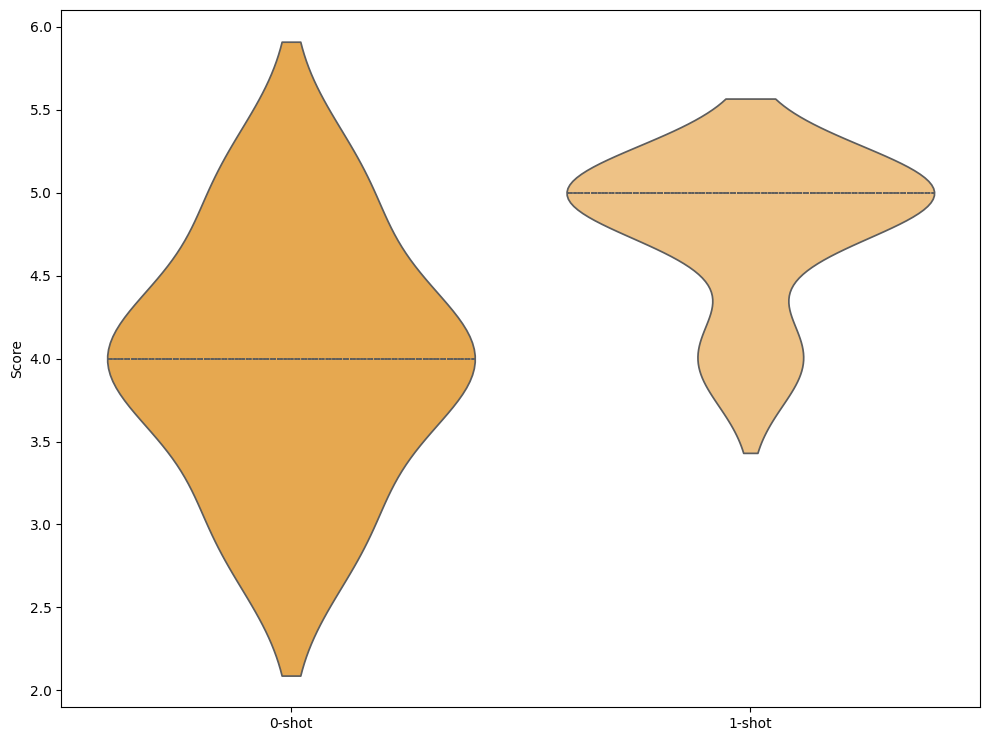

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Set up the figure with a single plot
fig, ax = plt.subplots(figsize=(10, 8))
#fig.suptitle('Comparison of 0-shot vs 1-shot Techniques by Expert Scores - Model Gemma 3', fontsize=16)

# Plot 2: Violin plot for mean scores
#ax = axs[0, 1]
#sns.violinplot(x='shot', y='score', data=result_form1, ax=ax, inner='quartile', color='lightblue')
sns.violinplot(x='shot', y='score', data=result_form1, ax=ax, hue='shot', inner='quartile', palette=[color_G3_0shot,color_G3_1shot],legend='auto')
#ax.set_title('Distribution of Scores by Technique')
ax.set_xlabel('')
ax.set_ylabel('Score')


plt.tight_layout()
plt.subplots_adjust(top=0.92)

# If you want to save the figure
plt.savefig('technique_comparison_gemma3_2round.png', dpi=300, bbox_inches='tight')

## Deepseek 0shot vs 1shot

In [13]:
df_deepseek_0vs1 = df_args.iloc[9:18].copy()

df_deepseek_0vs1 = df_deepseek_0vs1.drop(['gemma_0shot','gemma_1shot','llama_0shot','llama_1shot','rephrase'],axis=1)

df_deepseek_0vs1

,topic,0,1,2,opinions,deepseek_0shot,deepseek_1shot
9,119,Today the most corrupt socialism is capitalism...,"@AOC You brain dead un-AMERICAN freak, the Uni...",@AOC Gaslighter. Socialism under the guise of ...,Opinion 1:Today the most corrupt socialism is ...,The extent to which human activity is responsi...,Recurring cycles of warming and cooling have b...
10,1154,RT @RutgersEOAS: China and the U.S. have joint...,@KenCaldeira @latimes @ScienceJulia @carnegies...,#MeetTheLaureate: S.K. Satheesh's research on ...,Opinion 1:RT @RutgersEOAS: China and the U.S. ...,It is widely believed that human activity has ...,It is widely acknowledged that human activity ...
11,131,......3/3 ‘Hypothesis’ in science is only the ...,@joerogan : the hypothesis that 97% scientists...,"@JPearce59 @dcuthill @Peter_Fitz \""peer review...",Opinion 1:......3/3 ‘Hypothesis’ in science is...,It is widely believed that human activity is t...,Significant shifts in Earth's climate have bee...
12,1201,RT @monthly_review: Great article linking capi...,A bried moment of silence for our brothers and...,Now ZANU PF Minister of State for Manicaland P...,Opinion 1:RT @monthly_review: Great article li...,It is widely recognized that human activity ha...,It has been widely acknowledged that cyclone I...
13,147,@JuneCasagrande @Mededitor For what it’s worth...,Man made climate change is religion for atheis...,@ScientistMel No it does not! Plenty of atheis...,Opinion 1:@JuneCasagrande @Mededitor For what ...,It is widely believed by many that human activ...,Long-standing debates regarding the extent of ...
14,497,RT @DiscoverSoc: How politicians respond to cl...,"DC climate/energy pundit 1: \""Should we critic...",Listen carefully to every “POLITICIAN.” \nIf t...,Opinion 1:RT @DiscoverSoc: How politicians res...,It is widely recognized that the global commun...,It is widely acknowledged that politicians are...
15,155,@DoctorVive #NeverForget it was Frank Luntz wh...,@dvibrationz @Telstar_1962 @UN Back in 2002 mo...,@ajamubaraka Especially since Frank Luntz cook...,Opinion 1:@DoctorVive #NeverForget it was Fran...,It is widely believed that human activity pred...,"Over time, shifts in terminology regarding cli..."
16,796,Climate Change Impacting ‘Most’ Species on Ear...,RT @SUEtheTrex: Let’s focus on the myriad spec...,..There’s great tension in our own country ove...,Opinion 1:Climate Change Impacting ‘Most’ Spec...,The impact of climate change is being felt acr...,It is widely recognized that climate change ha...
17,158,This destroys the left's narrative that Islami...,Islamic State of Belgium and France is nearer ...,@johncardillo Islam slit them first anyway whe...,Opinion 1:This destroys the left's narrative t...,Climate change is increasingly perceived as a ...,Significant shifts in climate patterns have be...


In [14]:
args_result = interleave_columns(df_deepseek_0vs1,'deepseek_0shot','deepseek_1shot')
result_form_DS = pd.DataFrame({
    'arg': args_result,
    #'shot': args_result.index.map(lambda x: 0 if x % 2 else 1)
})

result_form_DS['Deepseekshot'] = result_form_DS.index.map(lambda x: 1 if x % 2 else 0)
list1 = R2_f2.iloc[0].to_list()
result_form_DS['score'] = list1
result_form_DS['shot'] = result_form_DS['Deepseekshot'].apply(lambda x: '0-shot' if x == 0 else '1-shot')

result_form_DS

,arg,Deepseekshot,score,shot
0,The extent to which human activity is responsi...,0,2,0-shot
1,Recurring cycles of warming and cooling have b...,1,1,1-shot
2,It is widely believed that human activity has ...,0,2,0-shot
3,It is widely acknowledged that human activity ...,1,3,1-shot
4,It is widely believed that human activity is t...,0,2,0-shot
5,Significant shifts in Earth's climate have bee...,1,4,1-shot
6,It is widely recognized that human activity ha...,0,1,0-shot
7,It has been widely acknowledged that cyclone I...,1,4,1-shot
8,It is widely believed by many that human activ...,0,1,0-shot
9,Long-standing debates regarding the extent of ...,1,4,1-shot


In [19]:
args_result

['The extent to which human activity is responsible for current climate change remains a subject of ongoing debate and investigation.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n',
 'Recurring cycles of warming and cooling have been observed in climate patterns over thousands of years, independent of human activity.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n',
 'It is widely believed that human activity has significantly contributed to the current state of climate change.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n',
 'It is widely acknowledged that human activity has dominated climate and environment, as evidenced by the significant impact of aerosol emissions on global warming. However, recent research highlights the role of natural phenomena in influencing climate change dynamics, challenging the dominant perception of human influence.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n',
 'It is widely believed tha

### draw image

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [18]:
def draw_image(result_form,title, filename,color1,color2):
    # Set up the figure with a single plot
    fig, ax = plt.subplots(figsize=(10, 8))
    #fig.suptitle('Comparison of 0-shot vs 1-shot Techniques by Expert Scores - Model DeepSeek-v2', fontsize=16)
    fig.suptitle(title, fontsize=16)
    
    # Plot 2: Violin plot for mean scores
    #ax = axs[0, 1]
    sns.violinplot(x='shot', y='score', data=result_form, ax=ax, hue='shot', inner='quartile', palette=[color1,color2],legend='auto')
#    sns.violinplot(x='shot', y='score', data=result_form, ax=ax, inner='quartile', color='lightblue')
    #ax.set_title('Distribution of Scores by Technique')
    ax.set_xlabel('')
    ax.set_ylabel('Score')
    
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    
    # If you want to save the figure
    plt.savefig(filename, dpi=300, bbox_inches='tight')

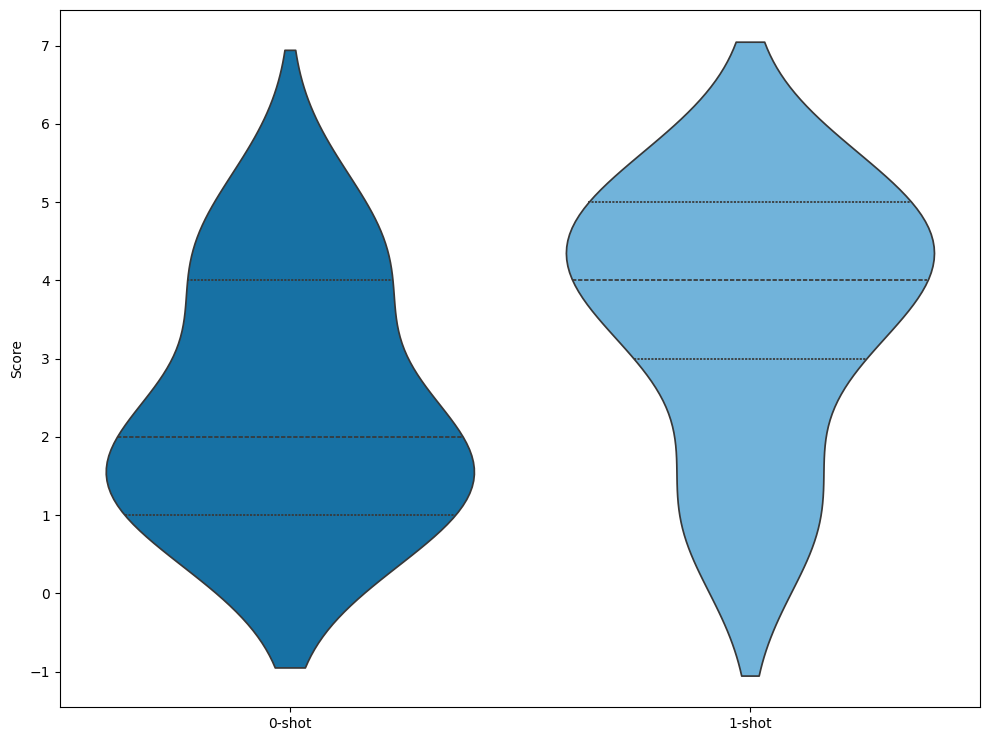

In [183]:
draw_image(result_form_DS,'','technique_comparison_DeepSeek_shots.png',color_DS_0shot,color_DS_1shot)

## Llama 0shot vs 1 shot

In [15]:
def filter_rows(df_args_global,row1,row2,list_models):
    res = df_args_global.iloc[row1:row2].copy()
    res = res.drop(list_models,axis=1)
    return res

In [31]:
filter_rows(df_args,18,27,['gemma_0shot','gemma_1shot','deepseek_0shot','deepseek_1shot','rephrase'])

,topic,0,1,2,opinions,llama_0shot,llama_1shot
18,2568,"\""The problem – and it’s an existential threat...",An existential threat both profound and perver...,'The problem...is that those who lead us and h...,"Opinion 1:\""The problem – and it’s an existent...",The extent of global warming is being exacerba...,The problem – and it’s an existential threat b...
19,211,You know that #climatechange is not a hoax (as...,@ProudResister Same weather and events 1000s o...,@atomicnews @transcendentfr2 @LindsayPB @nucle...,Opinion 1:You know that #climatechange is not ...,Concerns regarding #climatechange have been ra...,Claims about recent weather events and climate...
20,1668,@pandblvr @LotteyH @KaylaMarieCCP @i_womb @mic...,@karenscfld @RealCarlosSagan @emrazz It is not...,@RVoronaCote This is the fundamental problem w...,Opinion 1:@pandblvr @LotteyH @KaylaMarieCCP @i...,The notion that human activity is not the domi...,The notion that catastrophic manmade climate c...
21,213,@Hecate40 @IngersolRobert @Greg49039425 @bigsk...,@Trismos @awakeinks @kevpluck @rgatess @AltUS_...,@apoxongummint @Dcoronata @tomspolitics @Steve...,Opinion 1:@Hecate40 @IngersolRobert @Greg49039...,The extent of human influence on climate chang...,Major fluctuations in global temperature have ...
22,193,I completely understand some people not being ...,#OurPlanet on #netflix is a great series with ...,#OurPlanet on @netflix is a moving and astonis...,Opinion 1:I completely understand some people ...,The widespread concern regarding the impact of...,The role of humans in climate change is being ...
23,233,idiot gender theorist: “what if sex is not sim...,@Viviamano @blackcorvo @pussyslayer2213 You co...,"\""It is certainly ironic how liberals who post...",Opinion 1:idiot gender theorist: “what if sex ...,The notion that human activity is the sole dri...,Biological sex has been defined and understood...
24,835,An Asteroid could hit earth in 2029 if it's go...,"Asteroid impact disaster will happen, yet NASA...",This should put our political squabbles &amp; ...,Opinion 1:An Asteroid could hit earth in 2029 ...,Asteroid impacts and global warming marches ar...,It is widely acknowledged that an asteroid imp...
25,244,One guy with a marker just made the global war...,What’s wrong with global warming anyway? World...,It's not global warming. It's global ma'siyat....,Opinion 1:One guy with a marker just made the ...,The notion that human activity is the sole dri...,The notion that human activity is solely respo...
26,882,Und tatsächlich tritt nun auch die #Finma dem ...,The NGFS is the core of the response of centra...,NGFS - Why climate change is relevant for cent...,Opinion 1:Und tatsächlich tritt nun auch die #...,The global financial sector's lack of action o...,The growing recognition of the need for sustai...


### get_scores

In [16]:
###
# df_model: dataset with the arguments of model1 and model2
# col_model1: column of model 1 to compare
# col_model2: column of model 2 to compare
# col_shot: name of the column for the shot
# df_scores: dataframe with scores
###
def get_scores(df_model,col_model1,col_model2,col_shot,df_scores): 
    args_result = interleave_columns(df_model,col_model1,col_model2)
    #args_result = interleave_columns(df_deepseek_0vs1,'deepseek_0shot','deepseek_1shot')

    result_form_res = pd.DataFrame({
        'arg': args_result,
        #'shot': args_result.index.map(lambda x: 0 if x % 2 else 1)
    })
    
    #result_form_res['Deepseekshot'] = result_form_res.index.map(lambda x: 1 if x % 2 else 0)
    result_form_res[col_shot] = result_form_res.index.map(lambda x: 1 if x % 2 else 0)
    list1 = df_scores.iloc[0].to_list()
    result_form_res['score'] = list1
    result_form_res['shot'] = result_form_res[col_shot].apply(lambda x: '0-shot' if x == 0 else '1-shot')
    
    return result_form_res

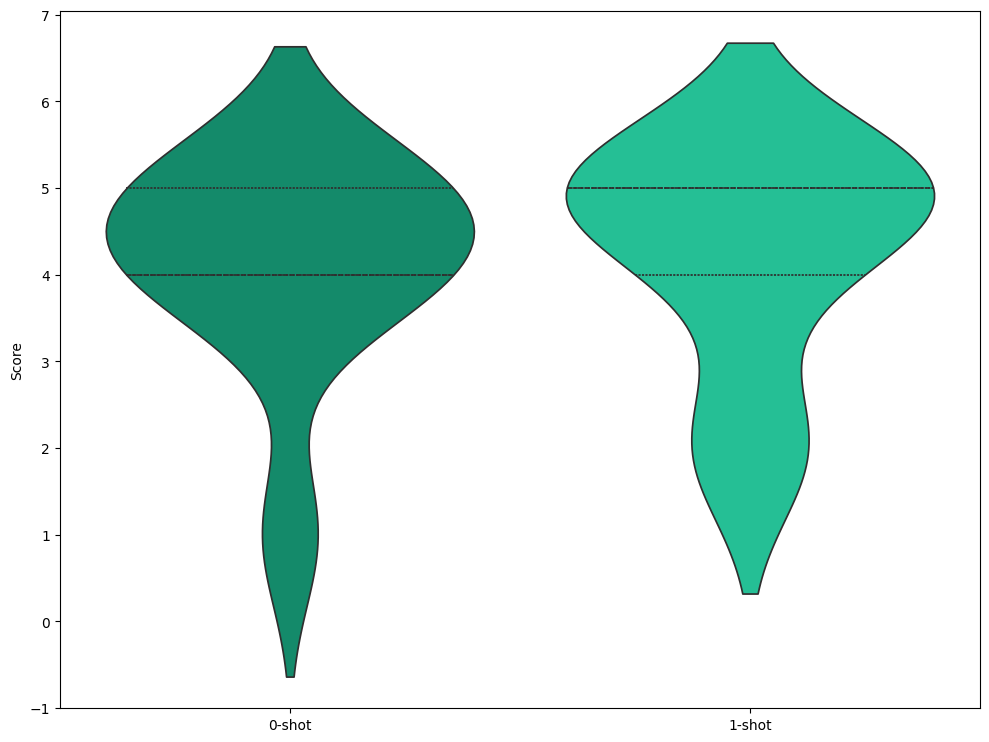

In [21]:
df_llama_0vs1 = filter_rows(df_args,18,27,['gemma_0shot','gemma_1shot','deepseek_0shot','deepseek_1shot','rephrase'])

df_llama_0vs1.head(2)

result_form_llama = get_scores(df_llama_0vs1,'llama_0shot','llama_1shot','Llamashot',R2_f3)

result_form_llama

draw_image(result_form_llama,'','technique_comparison_llama_shots.png',color_LL_0shot,color_LL_1shot)

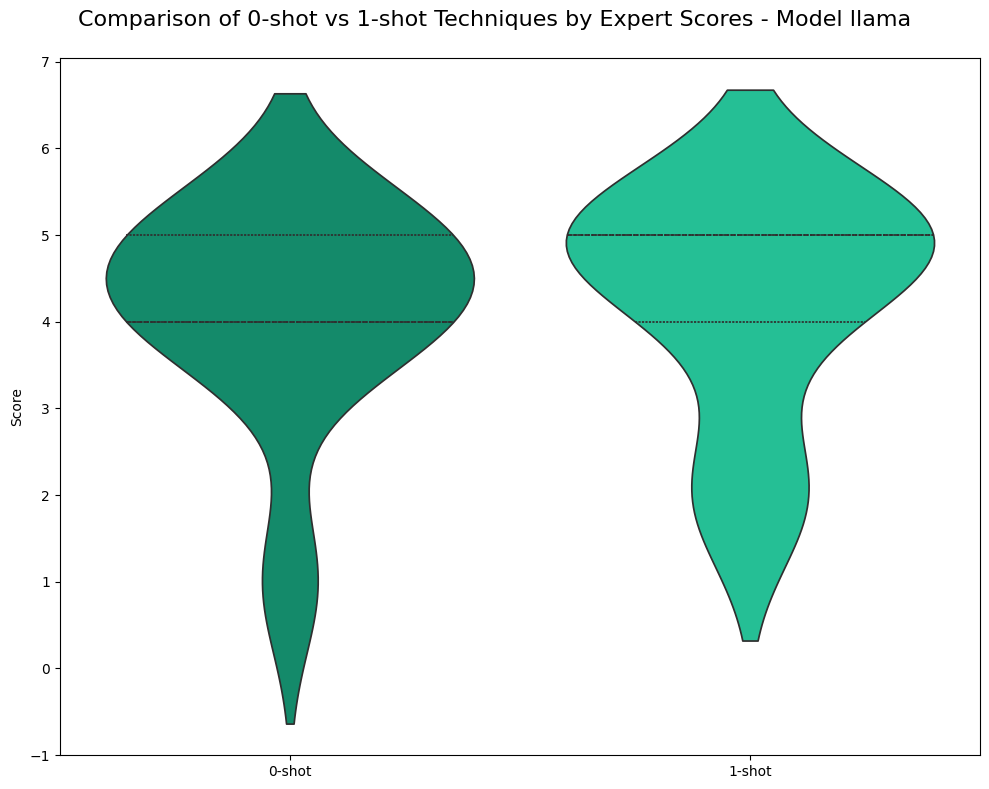

In [22]:
df_llama_0vs1 = filter_rows(df_args,18,27,['gemma_0shot','gemma_1shot','deepseek_0shot','deepseek_1shot','rephrase'])

df_llama_0vs1.head(2)

result_form_llama = get_scores(df_llama_0vs1,'llama_0shot','llama_1shot','Llamashot',R2_f3)

result_form_llama

draw_image(result_form_llama,'Comparison of 0-shot vs 1-shot Techniques by Expert Scores - Model llama','technique_comparison_llama_shots.png','#009e73','#0bd9a1')

In [47]:
df_llama_0vs1

,topic,0,1,2,opinions,llama_0shot,llama_1shot
18,2568,"\""The problem – and it’s an existential threat...",An existential threat both profound and perver...,'The problem...is that those who lead us and h...,"Opinion 1:\""The problem – and it’s an existent...",The extent of global warming is being exacerba...,The problem – and it’s an existential threat b...
19,211,You know that #climatechange is not a hoax (as...,@ProudResister Same weather and events 1000s o...,@atomicnews @transcendentfr2 @LindsayPB @nucle...,Opinion 1:You know that #climatechange is not ...,Concerns regarding #climatechange have been ra...,Claims about recent weather events and climate...
20,1668,@pandblvr @LotteyH @KaylaMarieCCP @i_womb @mic...,@karenscfld @RealCarlosSagan @emrazz It is not...,@RVoronaCote This is the fundamental problem w...,Opinion 1:@pandblvr @LotteyH @KaylaMarieCCP @i...,The notion that human activity is not the domi...,The notion that catastrophic manmade climate c...
21,213,@Hecate40 @IngersolRobert @Greg49039425 @bigsk...,@Trismos @awakeinks @kevpluck @rgatess @AltUS_...,@apoxongummint @Dcoronata @tomspolitics @Steve...,Opinion 1:@Hecate40 @IngersolRobert @Greg49039...,The extent of human influence on climate chang...,Major fluctuations in global temperature have ...
22,193,I completely understand some people not being ...,#OurPlanet on #netflix is a great series with ...,#OurPlanet on @netflix is a moving and astonis...,Opinion 1:I completely understand some people ...,The widespread concern regarding the impact of...,The role of humans in climate change is being ...
23,233,idiot gender theorist: “what if sex is not sim...,@Viviamano @blackcorvo @pussyslayer2213 You co...,"\""It is certainly ironic how liberals who post...",Opinion 1:idiot gender theorist: “what if sex ...,The notion that human activity is the sole dri...,Biological sex has been defined and understood...
24,835,An Asteroid could hit earth in 2029 if it's go...,"Asteroid impact disaster will happen, yet NASA...",This should put our political squabbles &amp; ...,Opinion 1:An Asteroid could hit earth in 2029 ...,Asteroid impacts and global warming marches ar...,It is widely acknowledged that an asteroid imp...
25,244,One guy with a marker just made the global war...,What’s wrong with global warming anyway? World...,It's not global warming. It's global ma'siyat....,Opinion 1:One guy with a marker just made the ...,The notion that human activity is the sole dri...,The notion that human activity is solely respo...
26,882,Und tatsächlich tritt nun auch die #Finma dem ...,The NGFS is the core of the response of centra...,NGFS - Why climate change is relevant for cent...,Opinion 1:Und tatsächlich tritt nun auch die #...,The global financial sector's lack of action o...,The growing recognition of the need for sustai...


### getscores_2model

In [23]:
###
# df_model: dataset with the arguments of model1 and model2
# col_model1: column of model 1 to compare
# col_model2: column of model 2 to compare
# col_shot: name of the column for the shot
# df_scores: dataframe with scores
# model1
# model2
###
def getscores_2model(df_model,col_model1,col_model2,col_shot,df_scores,model1,model2): 
    args_result = interleave_columns(df_model,col_model1,col_model2)
    #args_result = interleave_columns(df_deepseek_0vs1,'deepseek_0shot','deepseek_1shot')

    result_form_res = pd.DataFrame({
        'arg': args_result,
        #'shot': args_result.index.map(lambda x: 0 if x % 2 else 1)
    })
    
    #result_form_res['Deepseekshot'] = result_form_res.index.map(lambda x: 1 if x % 2 else 0)
    result_form_res[col_shot] = result_form_res.index.map(lambda x: 1 if x % 2 else 0)
    list1 = df_scores.iloc[0].to_list()
    result_form_res['score'] = list1
    result_form_res['shot'] = result_form_res[col_shot].apply(lambda x: model1 if x == 0 else model2)
    
    return result_form_res

## Gemma3 0shot vs Deepseek 0shot

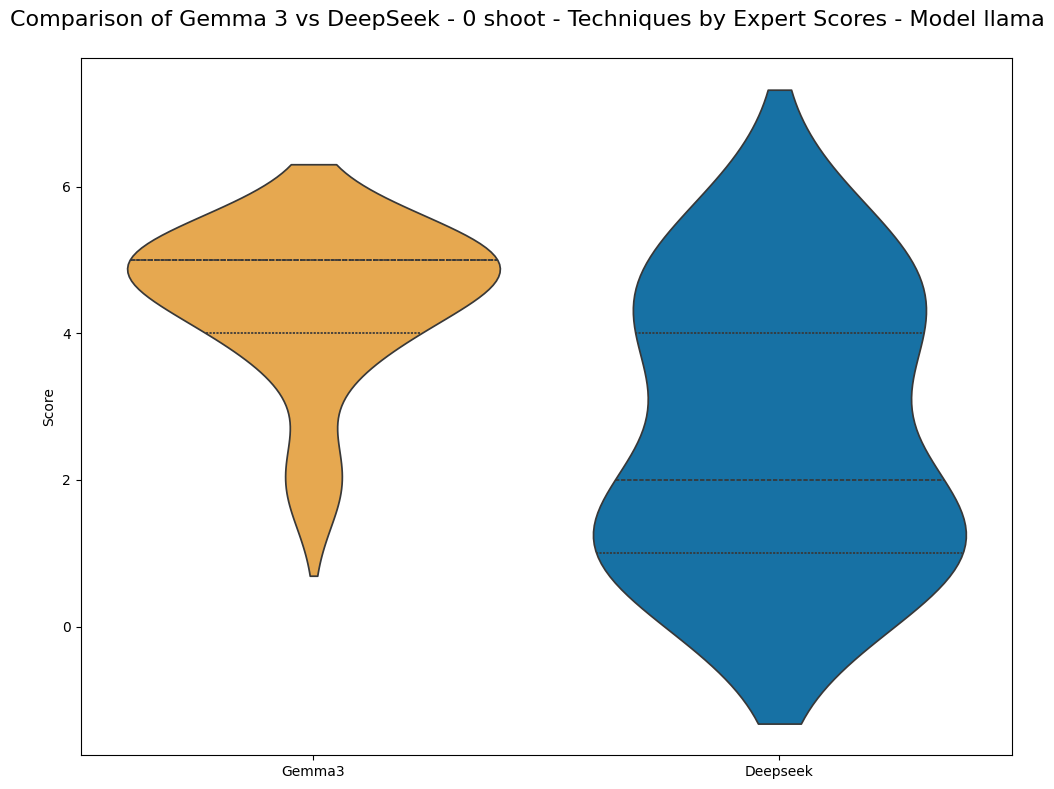

In [24]:
df_0shot_G3_DS = filter_rows(df_args,27,36,['gemma_1shot','deepseek_1shot','llama_0shot','llama_1shot','rephrase'])
result_form_G3vsDS_0s = getscores_2model(df_0shot_G3_DS,'gemma_0shot','deepseek_0shot','G3vsDS0shot',R2_f4,'Gemma3','Deepseek')
draw_image(result_form_G3vsDS_0s,'Comparison of Gemma 3 vs DeepSeek - 0 shoot - Techniques by Expert Scores - Model llama','technique_comparison_G3vsDS0shot.png',color_G3_0shot,color_DS_0shot)

In [65]:
result_form_G3vsDS_0s

,arg,G3vsDS0shot,score,shot
0,It is suggested that widespread concern regard...,0,4,Gemma3
1,It is widely believed that human activity is t...,1,1,Deepseek
2,Significant concerns are being raised globally...,0,5,Gemma3
3,It is widely suggested that human activity has...,1,1,Deepseek
4,It is suggested that considerable attention is...,0,2,Gemma3
5,It is widely believed that human activity pred...,1,1,Deepseek
6,Significant changes across the globe’s highest...,0,5,Gemma3
7,It has been found that the pace of climate cha...,1,5,Deepseek
8,It is suggested that significant attention is ...,0,5,Gemma3
9,It is widely believed that human activity has ...,1,5,Deepseek


In [52]:
R2_f4

,"Argument 1: It is suggested that widespread concern regarding climate change has been fostered, and a belief in its inevitability has been promoted. Observations of changes in the climate are frequently presented, and a sense of urgency is frequently communicated. The notion of a singular, scientifically-driven narrative is often emphasized, and the possibility of alternative explanations is frequently dismissed. The idea of a definitive, human-caused crisis is frequently presented, and the complexities of natural climate variability are often downplayed. It is suggested that a particular perspective is actively reinforced, and the potential for natural fluctuations is frequently overlooked.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n",Argument 2: It is widely believed that human activity is the dominant driver of current climate change.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n,"Argument 1: Significant concerns are being raised globally regarding the escalating impacts of rising waters, particularly in vulnerable regions like Fiji. Attention is being drawn to the disproportionate effects of observed changes, with suggestions being made about relocation as a potential response. Criticisms are being directed at actions that contribute to these changes, and the consequences of those actions are being highlighted. The urgency of the situation is being underscored, and the need for proactive measures is increasingly apparent. The implications of current trends are being recognized and debated, with a focus on the need for adaptation strategies.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n","Argument 2: It is widely suggested that human activity has significantly contributed to the current state of climate change, with various opinions reflecting on this issue.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n","Argument 1: It is suggested that considerable attention is being directed towards attributing climate shifts solely to human actions. The narrative is being shaped to portray a crisis primarily driven by human influence. Significant resources are being mobilized to emphasize this perspective, and considerable debate is being fostered around the extent of human responsibility. The focus is being maintained on the idea that a global shift is being presented as a consequence of human activity, and the issue is being framed to suggest a disproportionate role is being assigned to human actions.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n",Argument 2: It is widely believed that human activity predominantly drives current climate change.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n,"Argument 1: Significant changes across the globe’s highest latitudes are being observed at an accelerated rate. Data are being interpreted to suggest a heightened sensitivity to warming trends. Increased attention is being directed towards the rapid warming in these regions. The implications of these findings are being considered, and further investigation is being undertaken to understand the underlying mechanisms driving these pronounced shifts. It is being recognized that the magnitude of change is exceeding previous projections, particularly in areas experiencing the most rapid warming.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n","Argument 2: It has been found that the pace of climate change could be somewhat more severe than previously acknowledged, particularly in the fastest warming part of the world—its highest latitudes.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n","Argument 1: It is suggested that significant attention is being directed towards the issue of polar walruses, and that claims of human-caused climate change are being promoted through the framing of these events as tragedies. It is indicated that the behavior of polar bears is being misrepresented, with instances of ‘stampedings’ – nat

In [51]:
df_0shot_G3_DS

,topic,0,1,2,opinions,gemma_0shot,deepseek_0shot
27,251,"@tlitb @gjcats Reasonable, evidenced belief ca...",Is the climate change movement a ‘cult’? | Wat...,@ritchiedriveter @Danielle1239 @brianschatz I ...,"Opinion 1:@tlitb @gjcats Reasonable, evidenced...",It is suggested that widespread concern regard...,It is widely believed that human activity is t...
28,2679,In response to Fijian Prime Minister Frank Bai...,"John Alexander, the Liberal MP for Bennelong, ...","FMD these Libs are a smug, arrogant, out of to...",Opinion 1:In response to Fijian Prime Minister...,Significant concerns are being raised globally...,It is widely suggested that human activity has...
29,285,RT @sallyjos: Watch climate change deniers Gle...,@peytons92789237 @the_americanuck @AlbertaLibe...,@MeetThePress @MSNBC @chucktodd LIBS ARE CRAZY...,Opinion 1:RT @sallyjos: Watch climate change d...,It is suggested that considerable attention is...,It is widely believed that human activity pred...
30,2108,Findings from a new @NASA study released today...,"Quote:\nIf anything, the researchers found, th...","Sobering climate data has been confirmed... \""...",Opinion 1:Findings from a new @NASA study rele...,Significant changes across the globe’s highest...,It has been found that the pace of climate cha...
31,291,Susan Crockford: Netflix is lying about those ...,https://t.co/SIbLFbvc8R @netflix you make me...,@RupertDarwall @WMcHBg @netflix No why should ...,Opinion 1:Susan Crockford: Netflix is lying ab...,It is suggested that significant attention is ...,It is widely believed that human activity has ...
32,2307,RT @CycloneCharlie8: Reminder: gas is not a tr...,@ClimateKatie @MassEEA Dear @ClimateKatie - wh...,Renewable Natural Gas is reducing CO2 and comb...,Opinion 1:RT @CycloneCharlie8: Reminder: gas i...,Significant emissions are being observed globa...,It is widely recognized that human activity pl...
33,308,@Alichat66 @premitrom @Gyropitus @dearaunty @I...,@brilliantsights @CatrinNye @HackneyAbbott @Ex...,@brianschatz motherfucking climate change? Sta...,Opinion 1:@Alichat66 @premitrom @Gyropitus @de...,Significant concerns are raised regarding the ...,It is widely believed that human activity is t...
34,1988,RT @HydrogenNw: Government urged to back carbo...,Would someone please explain why climate chang...,They did it. States Assembly declares a climat...,Opinion 1:RT @HydrogenNw: Government urged to ...,Significant investments are being directed tow...,It is widely believed that human activity has ...
35,365,More than 570 people have been arrested over t...,Number of #ExtinctionRebellion protesters arre...,Mass arrests of climate change protesters cont...,Opinion 1:More than 570 people have been arres...,Persistent arrests of climate activists in Lon...,Arrests in response to climate change protests...


## Deepseek vs Llama 0 shot

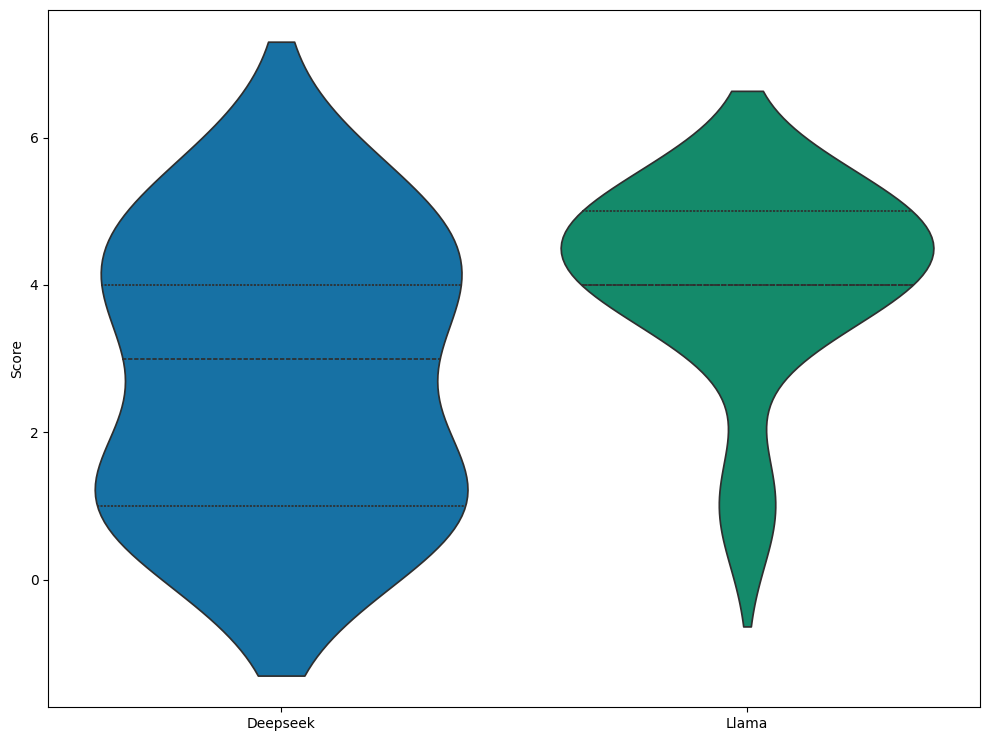

In [25]:
df_0shot_DS_LL = filter_rows(df_args,36,45,['gemma_0shot','gemma_1shot','deepseek_1shot','llama_1shot','rephrase'])
result_form_DSvsLL_0s = getscores_2model(df_0shot_DS_LL,'deepseek_0shot','llama_0shot','DSvsLL0shot',R2_f5,'Deepseek','Llama')
draw_image(result_form_DSvsLL_0s,'','technique_comparison_DSvsLL0shot.png',color_DS_0shot,color_LL_0shot)

In [58]:
result_form_G3vsDS_0s

,arg,DSvsLL0shot,score,shot
0,It has been widely recognized by environmental...,0,3,0-shot
1,The lack of a comprehensive discussion on clim...,1,5,1-shot
2,Climate change is widely perceived as a signif...,0,1,0-shot
3,A pressing concern regarding climate change ha...,1,5,1-shot
4,The global ocean is widely recognized as havin...,0,4,0-shot
5,Global weather and climate patterns are dramat...,1,5,1-shot
6,The extent of human influence on climate chang...,0,1,0-shot
7,Concerns regarding the impact of human activit...,1,4,1-shot
8,It is widely recognized that air conditioning ...,0,5,0-shot
9,The threat of climate change is being exacerba...,1,1,1-shot


In [57]:
df_0shot_DS_LL

,topic,0,1,2,opinions,deepseek_0shot,llama_0shot
36,1680,"\""The past two presidential cycles, environmen...",Not a single question about climate change was...,@MichaelEMann @holivarez19 @KHayhoe @DrKWilkin...,"Opinion 1:\""The past two presidential cycles, ...",It has been widely recognized by environmental...,The lack of a comprehensive discussion on clim...
37,410,"The Hill: Dems want climate change, tax hikes ...","@maydaymindy9 I get you, but they should be do...","Not for nothing...but if a Dem takes the WH, i...","Opinion 1:The Hill: Dems want climate change, ...",Climate change is widely perceived as a signif...,A pressing concern regarding climate change ha...
38,1340,El Niño–Like Physical and Biogeochemical Ocean...,"@350Montana @PaulEDawson When the PDO, or othe...",@CavalloAnita @JeffLindner1 Not conclusive. Se...,Opinion 1:El Niño–Like Physical and Biogeochem...,The global ocean is widely recognized as havin...,Global weather and climate patterns are dramat...
39,413,RT @npcdailysite: Liberals are refusing to cha...,"@ThomasPudgy @ggreenwald Ok, apologies for the...",How sad. These Liberals hate oil and gas and a...,Opinion 1:RT @npcdailysite: Liberals are refus...,The extent of human influence on climate chang...,Concerns regarding the impact of human activit...
40,776,wef: Air conditioning is threatening our abili...,RT @UNEnvironmentNA: Against the threat of #cl...,David Attenborough climate change 'call to arm...,Opinion 1:wef: Air conditioning is threatening...,It is widely recognized that air conditioning ...,The threat of climate change is being exacerba...
41,438,@ArtsLetter Oh bs crap study.\n\n Bet anything...,@CutRealty @ConCaracal Cooling was a 70s theor...,@BillOReilly In the 70 s-80 s it was global co...,Opinion 1:@ArtsLetter Oh bs crap study.\n\n Be...,"In recent decades, there has been a significan...",The prevailing notion of human-induced climate...
42,690,"Bill Shorten: \""The campaign against climate c...",@billshortenmp The head bobbers are trying to ...,@_seanhart_ @macsween_prue @billshortenmp @Aus...,"Opinion 1:Bill Shorten: \""The campaign against...",Claims regarding the costs of Labor's climate ...,The extent of human influence on current clima...
43,531,@MetroUK \n@David Bellemy:\nThe BBC froze me o...,RT @primrosetaxi: David Bellamy got dropped fr...,Sad that Sir David (once respected) has given ...,Opinion 1:@MetroUK \n@David Bellemy:\nThe BBC ...,It is widely believed that human activity pred...,The dominant narrative surrounding global warm...
44,2481,RT @MickMcAteer: Much talk about need for mass...,"It's inevitable given climate change, but stil...",@RossalynWarren @e_carattin While climate chan...,Opinion 1:RT @MickMcAteer: Much talk about nee...,It has been widely recognized that human activ...,The need for massive reallocation of capital t...


## Llama vs Gemma3 - 0shot

In [27]:
def move_column(df, from_idx, to_idx):
    cols = df.columns.tolist()
    col = cols.pop(from_idx)
    cols.insert(to_idx, col)
    return df[cols]

# Usage
#df = move_column(df, 7, 6)

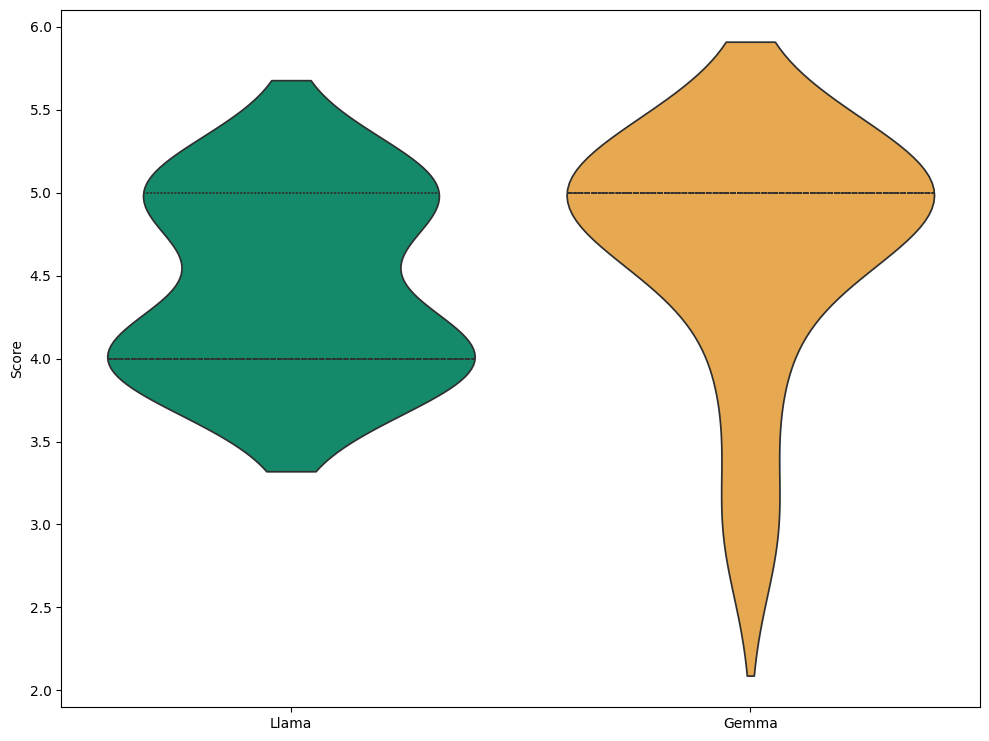

In [28]:
df_0shot_LL_G3 = filter_rows(df_args,45,54,['gemma_1shot','deepseek_0shot','deepseek_1shot','llama_1shot','rephrase'])
df_0shot_LL_G3_reorder = move_column(df_0shot_LL_G3, 5, 6)
result_form_LLvsG3_0s = getscores_2model(df_0shot_LL_G3_reorder,'llama_0shot','gemma_0shot','LLvsG30shot',R2_f6,'Llama','Gemma')
draw_image(result_form_LLvsG3_0s,'','technique_comparison_LLvsG30shot.png',color_LL_0shot,color_G3_0shot)

In [91]:
result_form_LLvsG3_0s

,arg,LLvsG30shot,score,shot
0,Concerns regarding the impact of climate chang...,0,5,Llama
1,Questions regarding the extent of human influe...,1,4,Gemma
2,The widespread concern about the impact of hum...,0,5,Llama
3,Significant alterations across the globe are b...,1,3,Gemma
4,The extent of human influence on current clima...,0,4,Llama
5,It is questioned how significantly the planet’...,1,5,Gemma
6,The effects of climate change are being exacer...,0,4,Llama
7,Significant pressures are being exerted on vul...,1,5,Gemma
8,Concerns regarding climate change have been ra...,0,5,Llama
9,It is suggested that atmospheric alterations a...,1,5,Gemma


## Gemma vs DS 1shot

In [160]:
df_1shot_G3_DS.head(2)

,topic,0,1,2,opinions,gemma_1shot,deepseek_1shot
54,2294,RT @jillyrutter: Planners need to to be assert...,"♻ With climate change in mind for the future, ...",The major planks of the climate change plan pr...,Opinion 1:RT @jillyrutter: Planners need to to...,It is recognized that ambitious plans are bein...,It is widely acknowledged that climate change ...
55,905,NewsATW\nExtinction Rebellion: Olympic canoein...,BBC News - Extinction Rebellion: Olympic canoe...,@EtienneStott How disappointing that a so call...,Opinion 1:NewsATW\nExtinction Rebellion: Olymp...,"Arrests of prominent figures, including an Oly...",Repeated instances of arrests and public demon...


In [161]:
result_form_G3vsDS_1s.head(2)

,arg,G3vsDS1shot,score,shot
0,It is recognized that ambitious plans are bein...,0,5,Gemma
1,It is widely acknowledged that climate change ...,1,4,Deepseek


In [163]:
result_form_G3vsDS_1s.head(4)

,arg,G3vsDS1shot,score,shot
0,It is recognized that ambitious plans are bein...,0,5,Gemma
1,It is widely acknowledged that climate change ...,1,4,Deepseek
2,"Arrests of prominent figures, including an Oly...",0,5,Gemma
3,Repeated instances of arrests and public demon...,1,4,Deepseek


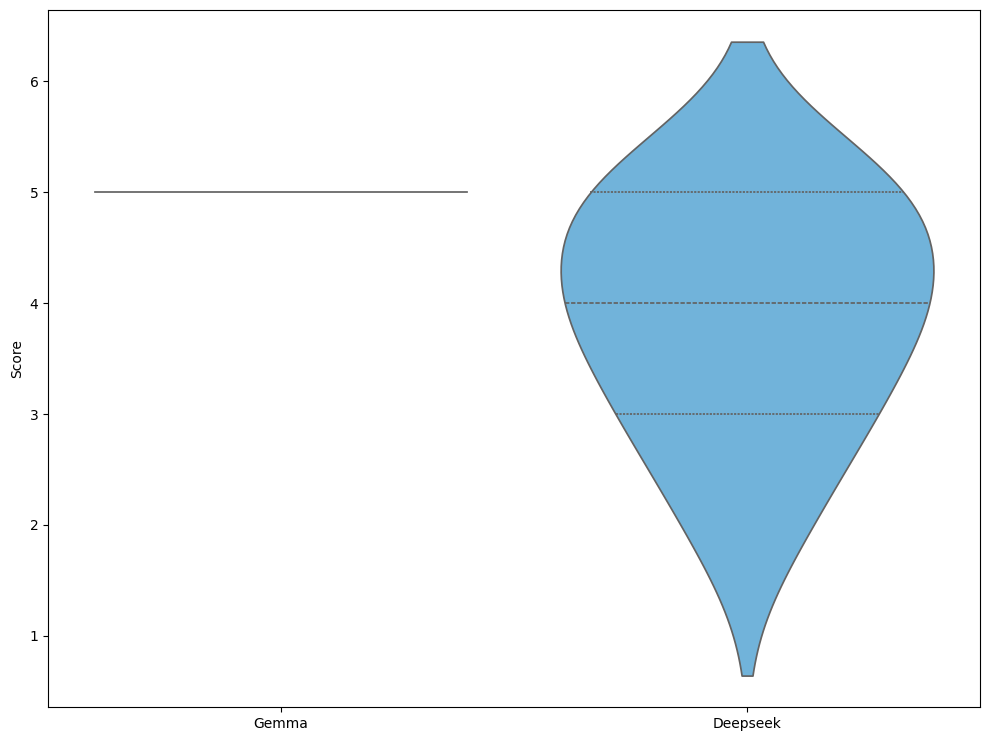

In [29]:
df_1shot_G3_DS = filter_rows(df_args,54,63,['gemma_0shot','deepseek_0shot','llama_0shot','llama_1shot','rephrase'])
#df_0shot_LL_G3_reorder = move_column(df_0shot_LL_G3, 5, 6)
result_form_G3vsDS_1s = getscores_2model(df_1shot_G3_DS,'gemma_1shot','deepseek_1shot','G3vsDS1shot',R2_f7,'Gemma','Deepseek')
draw_image(result_form_G3vsDS_1s,'','technique_comparison_G3vsDS1shot.png',color_G3_1shot,color_DS_1shot)

In [182]:
df_1shot_G3_DS

,topic,0,1,2,opinions,gemma_1shot,deepseek_1shot
54,2294,RT @jillyrutter: Planners need to to be assert...,"♻ With climate change in mind for the future, ...",The major planks of the climate change plan pr...,Opinion 1:RT @jillyrutter: Planners need to to...,It is recognized that ambitious plans are bein...,It is widely acknowledged that climate change ...
55,905,NewsATW\nExtinction Rebellion: Olympic canoein...,BBC News - Extinction Rebellion: Olympic canoe...,@EtienneStott How disappointing that a so call...,Opinion 1:NewsATW\nExtinction Rebellion: Olymp...,"Arrests of prominent figures, including an Oly...",Repeated instances of arrests and public demon...
56,836,On to @ExtinctionR after #vegan XR pancakes. E...,RT @NLRebellion: Rebel bison. Rebel against ha...,UPDATE - #ExtinctionRebellion Rebels continue ...,Opinion 1:On to @ExtinctionR after #vegan XR p...,It is observed that actions are being taken by...,It is widely acknowledged that Extinction Rebe...
57,909,@rolandparis Global warming/climate change is ...,@DamonPelham @theheraldsun Mate you’re a bloke...,@MikeJohnstonCO Green New Deal? Are you nuts? ...,Opinion 1:@rolandparis Global warming/climate ...,Persistent claims of a human-caused climate cr...,"Over the past several years, significant fluct..."
58,1203,#goddess #spiritual #vegan #vegetarianism #com...,RT @tsemtulku: Super \n\n #goddess #spiritual ...,#buddhism #buddhahood #buddhist #saveourplanet...,Opinion 1:#goddess #spiritual #vegan #vegetari...,It is observed that a confluence of factors is...,It is widely recognized that the practice of v...
59,957,Woman glues her breasts to the ground in one-w...,@1776Stonewall WOWZERS we should definitely ta...,"@1966Smith So her doing that, is preventing po...",Opinion 1:Woman glues her breasts to the groun...,"Actions, including disruptive demonstrations, ...",Significant actions by individuals have been o...
60,1061,"@Fact actually, koalas are facing exctinction ...","RT @BooksFaunaverse: Koalas- so cute, so frigh...",Too bad that climate change and environmental ...,"Opinion 1:@Fact actually, koalas are facing ex...","Significant losses of koala habitat, stemming ...",It is widely acknowledged that the vulnerabili...
61,984,@StopTrudeau2019 @cathmckenna Given the state ...,@NOAASatellites @NHC_Atlantic What an excellen...,@CarnalConsrvatv @MorganPaulett @not_sargon Mo...,Opinion 1:@StopTrudeau2019 @cathmckenna Given ...,Significant changes in global weather patterns...,"Over the past decades, climate patterns across..."
62,1180,Humans and climate change responsible for exti...,@JimmyLevy15 @CaptYonah Jimmy your lack of edu...,RT @ScienceNews: The mammoths and other specie...,Opinion 1:Humans and climate change responsibl...,It is observed that the extinction of the wool...,It is widely recognized that humans have playe...


## Deepseek vs Llama - 1shot

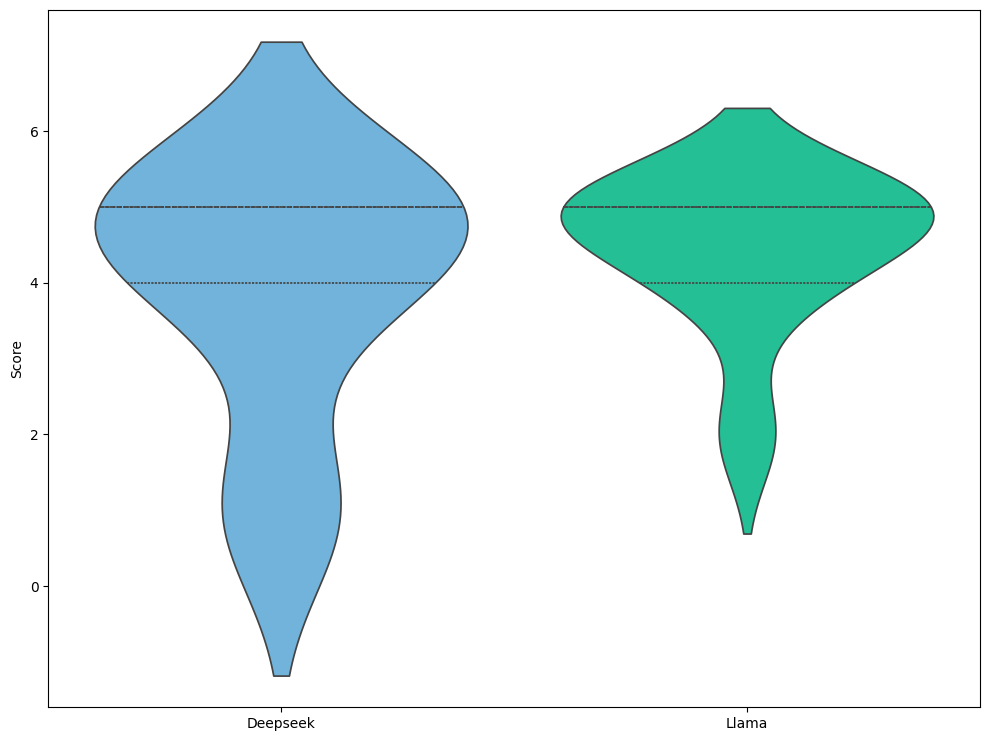

In [30]:
df_1shot_DS_LL = filter_rows(df_args,63,72,['gemma_0shot','gemma_1shot','deepseek_0shot','llama_0shot','rephrase'])
#df_0shot_LL_G3_reorder = move_column(df_0shot_LL_G3, 5, 6)
result_form_DSvsLL_1s = getscores_2model(df_1shot_DS_LL,'deepseek_1shot','llama_1shot','DSvsLL1shot',R2_f8,'Deepseek','Llama')
draw_image(result_form_DSvsLL_1s,'','technique_comparison_DSvsLL1shot.png',color_DS_1shot,color_LL_1shot)

In [181]:
df_1shot_DS_LL

,topic,0,1,2,opinions,deepseek_1shot,llama_1shot
63,1036,LNP Senate candidate accuses BOM of fudging da...,"Queensland voters have this Senator, Rennick, ...",Qld LNP Senate hopeful Gerard Rennick is peddl...,Opinion 1:LNP Senate candidate accuses BOM of ...,Conspiratorial claims have emerged suggesting ...,Claims of data manipulation by the Bureau of M...
64,346,RT @eamorris_: 3 councillors refused to call c...,St. Catharines city council unanimously passes...,@elliegoulding @robdelaney @theresa_may All co...,Opinion 1:RT @eamorris_: 3 councillors refused...,It has been widely recognized that local counc...,It is widely acknowledged that the lack of urg...
65,1048,UK police arrest almost 1000 in climate change...,@johnpilger The MSM much prefers to centre on ...,Interesting factual statistics today. The Brex...,Opinion 1:UK police arrest almost 1000 in clim...,"Over recent years, significant numbers of indi...",Majority of protesters involved in recent clim...
66,419,"As the world tackles global warming, hydrogen ...",@UNEnvironment @UN The best part of using a hy...,Looking forward to speaking at today’s #Hydrog...,"Opinion 1:As the world tackles global warming,...",It is widely recognized that hydrogen has emer...,The use of hydrogen as a clean-energy alternat...
67,1103,@stevebudd18 @Dcoronata @sueytonius @Tim841867...,@sueytonius @dennywhite11 @david_hanselman @Jo...,@Racing_Away @Andrewemcameron @DawnTJ90 @AltUS...,Opinion 1:@stevebudd18 @Dcoronata @sueytonius ...,Concerns regarding the extent of human influen...,Major shifts in global temperature have been d...
68,1366,RT @A_Thellmann: Flying cars could save us fro...,We must use electric aircraft engines instead ...,@dannymartin8228 I am not saying we shouldn’t ...,Opinion 1:RT @A_Thellmann: Flying cars could s...,It has been widely acknowledged that the use o...,It is widely acknowledged that the use of elec...
69,1107,@ObliviousReaper @Olgachristie But a 15 year o...,Why do the media luvies insist teenage girls g...,Teenage girls joining ISIS were groomed and br...,Opinion 1:@ObliviousReaper @Olgachristie But a...,Recurring cycles of climate change have been o...,The media's selective attention towards teenag...
70,968,".@chriscoons , Thank you for being a leader on...",@GlobalEcoGuy @heidi_k_edmonds So true @Global...,You’ve heard of cap-and-trade. But what about ...,"Opinion 1:.@chriscoons , Thank you for being a...",It has been recognized that market-friendly le...,It is widely acknowledged that market-friendly...
71,1142,"Julie Burchill, once pretended to be a Marxist...",@Pukeko65 Maybe the climate change scaremonger...,@EnergyJvd @ShellenbergerMD That’s the (neo)Ma...,"Opinion 1:Julie Burchill, once pretended to be...",Long-standing patterns of climate variability ...,Climate change protests have been misrepresent...


## Llama vs Gemma -1shot

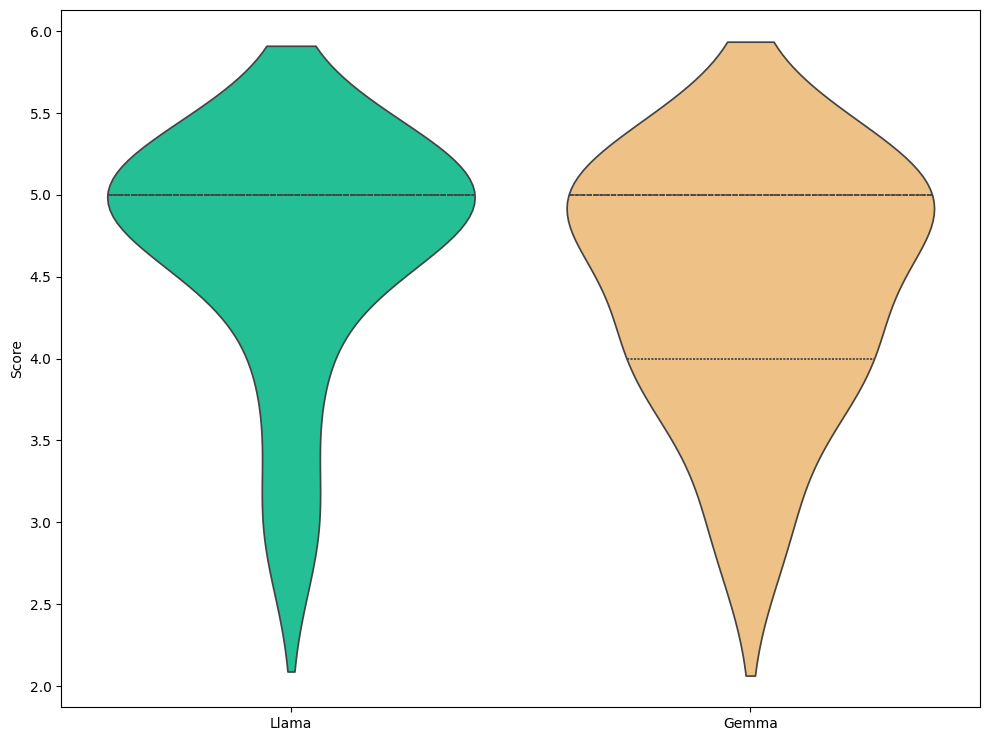

In [31]:
df_1shot_LL_G3 = filter_rows(df_args,72,82,['gemma_0shot','deepseek_0shot','deepseek_1shot','llama_0shot','rephrase'])
df_1shot_LL_G3_reorder = move_column(df_1shot_LL_G3, 5, 6)
result_form_LLvsG3_1s = getscores_2model(df_1shot_LL_G3_reorder,'llama_1shot','gemma_1shot','LLvsG31shot',R2_f9,'Llama','Gemma')
draw_image(result_form_LLvsG3_1s,'','technique_comparison_LLvsG3_1s.png',color_LL_1shot,color_G3_1shot)

In [205]:
R2_f9

,Timestamp,Email Address,"Argument 1: The construction of hundreds of new coal plants abroad by China is being viewed with concern, as it appears to contradict the country's efforts to combat climate change. The decision to build these plants despite shutting major coal power plants domestically has raised questions about the consistency of China's climate change policies. It is noted that the increase in coal power capacity will be equivalent to the entire US coal fleet, which may undermine global efforts to reduce greenhouse gas emissions.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n",Comments for Argument 1:,"Argument 2: Significant investments in coal-fired power plants are being made globally, including hundreds of new projects approved by China. Simultaneously, efforts to combat climate change, such as the closure of major coal power plants, are being undertaken. The expansion of coal-fired power capacity, particularly in other nations, is being observed. Concerns are being raised regarding the implications of this shift, and the need for a comprehensive approach to addressing the challenges posed by increased energy production is being recognized.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n",Comments for Argument 2:,"If you can rephrase a better argument based on the three opinions, write it here:","Argument 1: The notion of man-made climate change has been met with ridicule and dismissal from certain quarters. Some individuals have expressed skepticism about the existence of human-induced climate change, suggesting that it is merely a natural phenomenon. Others have questioned the motivations behind the concept of man-made climate change, implying that it may be linked to broader agendas such as the New World Order or centralized control.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n",Comments for Argument 1: .1,"Argument 2: Persistent claims of human-induced climate change have been repeatedly dismissed. Suggestions of a manufactured crisis have been circulated, often linked to unfounded theories regarding atmospheric manipulation and covert agendas. Concerns about the influence of specific technologies, such as HAARP and chem trails, have been raised. The notion of a singular, human-driven climate shift has been challenged, with alternative explanations for observed temperature fluctuations frequently proposed. The idea of a deliberate, orchestrated climate transformation has been persistently asserted, often accompanied by accusations of hidden motives and a desire for centralized control.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n",...,"Argument 1: Historical predictions and warnings about catastrophic climate change have been made, but their accuracy and relevance have not been consistently upheld over time. The notion that drastic action must be taken to prevent a hypothetical future disaster has led to a sense of urgency among some groups, while others remain skeptical about the severity of the issue.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n",Comments for Argument 1: .7,"Argument 2: Predictions regarding catastrophic climate outcomes, such as widespread submersion, have been made repeatedly throughout history, and these forecasts have consistently failed to materialize. Claims of imminent global disaster, originating from sources like the UN in 1989, have been repeatedly challenged by the passage of time. Historical projections of global warming have been dismissed as unfounded, and the notion of a sudden, irreversible climate catastrophe has been questioned based on past predictions.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n",Comments for Argument 2: .7,"If you can rephrase a better argument based on the three opinions, write it here: .7","Argument 1: The most populous and fastest-growing cities in Africa are being increasingly exposed to the impacts of climate change, with rising temperatures an

In [180]:
df_1shot_LL_G3

,topic,0,1,2,opinions,gemma_1shot,llama_1shot
72,1003,China has taken dramatic steps to fight climat...,RT @StimsonCenter: China is cleaning up and fi...,China has approved the construction of hundred...,Opinion 1:China has taken dramatic steps to fi...,Significant investments in coal-fired power pl...,The construction of hundreds of new coal plant...
73,1199,RT @Sideways_On: @RLong_Bailey If only you und...,Hahahahahahahahhahahahahahahahahhahahaahhahaha...,@Ilhan Man made climate change should be calle...,Opinion 1:RT @Sideways_On: @RLong_Bailey If on...,Persistent claims of human-induced climate cha...,The notion of man-made climate change has been...
74,1619,Let's #ChangeTheDebate &amp; raise the bar! \n...,RT @collinrees: Tell the @DNC to make climate ...,"30,000 signatures in 48 hours on the US #Youth...",Opinion 1:Let's #ChangeTheDebate &amp; raise t...,It is recognized that a demand for a climate c...,The need for climate change to be prioritized ...
75,1213,RT @AnthonyBialy: @brhodes Earth's greatest vi...,@Alichat66 @antic2000 @premitrom @Gyropitus @I...,@EddieZipperer So you guys are going to set up...,Opinion 1:RT @AnthonyBialy: @brhodes Earth's g...,Significant concerns have been raised regardin...,Concerns about the allocation of funds for cli...
76,1732,Learn about climate change. Visit and subscrib...,Fun and informative way to learn more about #c...,@thismorning If they all believe so strongly g...,Opinion 1:Learn about climate change. Visit an...,It is recognized that a significant increase i...,It is widely acknowledged that learning about ...
77,1233,Arun Jaitley and his experiments with untruth ...,The Economist jumps on the global warming hyst...,Climate Scientists Laugh at Global Warming Hys...,Opinion 1:Arun Jaitley and his experiments wit...,Claims regarding the primary role of human act...,Global warming hysteria has been perpetuated b...
78,325,The world's shallowest lake is shrinking but s...,Keen to see the next phase of this research pr...,@EddieGreatLakes An interview with @danpatrick...,Opinion 1:The world's shallowest lake is shrin...,It is observed that the world’s shallowest lak...,"The shrinking of Lake Chad is being observed, ..."
79,1239,@CraigRSawyer @UkraineBlues This is from 1989 ...,@RLong_Bailey In 1989 the UN said we would be ...,"From the bizarre world of CNN's @jdsutter: \""I...",Opinion 1:@CraigRSawyer @UkraineBlues This is ...,Predictions regarding catastrophic climate out...,Historical predictions and warnings about cata...
80,538,wef: Africa’s fastest-growing #cities are the ...,@MaplecroftRisk @Comarchitect @CAPplanners @UN...,New Orleans is our most vulnerable large city ...,Opinion 1:wef: Africa’s fastest-growing #citie...,It is recognized that Africa’s fastest-growing...,The most populous and fastest-growing cities i...


In [173]:
R2_f9.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Argument 1: The construction of hundreds of new coal plants abroad by China is being viewed with concern, as it appears to contradict the country's efforts to combat climate change. The decision to build these plants despite shutting major coal power plants domestically has raised questions about the consistency of China's climate change policies. It is noted that the increase in coal power capacity will be equivalent to the entire US coal fleet, which may undermine global efforts to reduce greenhouse gas emissions.
 Evaluate this argument on a scale of 1(worst) to 5 (best):
 to Argument 2: It is recognized that Africa’s fastest-growing cities, including Kampala, Dar-es-Salaam, and Abuja, are being increasingly impacted by the effects of climate change. Similarly, large cities like New Orleans and Norfolk are experiencing heightened vulnerability due to rising sea levels and subsidence. The consequences of these trends are being 

In [177]:
df_1shot_LL_G3_reorder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 72 to 80
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   topic        9 non-null      int64 
 1   0            9 non-null      object
 2   1            9 non-null      object
 3   2            9 non-null      object
 4   opinions     9 non-null      object
 5   llama_1shot  9 non-null      object
 6   gemma_1shot  9 non-null      object
dtypes: int64(1), object(6)
memory usage: 636.0+ bytes


## Mean calculations


In [231]:
df_args

,topic,0,1,2,opinions,gemma_0shot,gemma_1shot,deepseek_0shot,deepseek_1shot,llama_0shot,llama_1shot,rephrase
0,2216,@viraniarif The Ctax has zero effect on climat...,“Canada's budget watchdog @PBO_DPB agrees with...,PBO: Most #Canadians To Get More From Rebate T...,Opinion 1:@viraniarif The Ctax has zero effect...,It is observed that significant revenues are p...,It is observed that a climate change tax rebat...,It is widely believed that human activity is t...,It is widely acknowledged that the majority of...,The notion that human activity has a negligibl...,It is widely acknowledged that the climate cha...,If you can rephrase a better argument based on...
1,40,@Claudiashein I though that you’re was going t...,RT @RossMac57626948: Could get used to this gl...,@CdnAngel1970 @Canadian_Zero @GreenGruff @Gina...,Opinion 1:@Claudiashein I though that you’re w...,It is suggested that significant fluctuations ...,Persistent claims of global warming have been ...,"It has been widely believed by many, including...",Significant climatic changes have occurred thr...,The widespread perception that human activity ...,A growing number of individuals have expressed...,If you can rephrase a better argument based on...
2,2227,"Over 1,000 homes flooded across Quebec as wate...",RT @francisdalfo: @cathmckenna Downtown Montre...,@Pepperfire @subvoyeur Floods have been record...,"Opinion 1:Over 1,000 homes flooded across Queb...",Significant increases in extreme weather event...,Increasingly frequent and severe flooding even...,"In numerous locations across the globe, there ...",It has been observed that floods across variou...,The rising water levels in Quebec and Montreal...,Flooding events are becoming increasingly freq...,If you can rephrase a better argument based on...
3,48,@Sheldon_Walker_ @Oletros @ZLabe @EthonRaptor ...,@PGHowie2 @JohnFugelsang Wasn't there an ice a...,all 5 of the major ice ages on earth have last...,Opinion 1:@Sheldon_Walker_ @Oletros @ZLabe @Et...,It is believed that global warming is primaril...,Recurring glacial and interglacial periods hav...,The extent of human influence on climate chang...,Recurring patterns of glaciation and deglaciat...,The prevailing notion that human activity is t...,Major fluctuations in Earth's climate have bee...,If you can rephrase a better argument based on...
4,154,"If the Dems nominate Biden, they deserve to lo...","@JoeBiden Please, VP Biden. Do the country a f...","\""Joe will have to prove it if he wants the cl...","Opinion 1:If the Dems nominate Biden, they des...",Significant concerns are being raised regardin...,It is recognized that a particular candidate's...,It is widely believed that human activity is t...,It is widely acknowledged that if Joe Biden we...,The world's collective fate is weighed down by...,It is widely acknowledged that a reality TV st...,If you can rephrase a better argument based on...
...,...,...,...,...,...,...,...,...,...,...,...,...
76,1732,Learn about climate change. Visit and subscrib...,Fun and informative way to learn more about #c...,@thismorning If they all believe so strongly g...,Opinion 1:Learn about climate change. Visit an...,Significant attention is being directed toward...,It is recognized that a significant increase i...,It is widely believed that human activity play...,It is widely acknowledged that there are numer...,The extent of human influence on current clima...,It is widely acknowledged that learning about ...,If you can rephrase a better argument based on...
77,1233,Arun Jaitley and his experiments with untruth ...,The Economist jumps on the global warming hyst...,Climate Scientists Laugh at Global Warming Hys...,Opinion 1:Arun Jaitley and his experiments wit...,Questions regarding the extent of human influe...,Claims regarding the primary role of human act...,The extent of human influence on climate chang...,Recurring cycles of global temperature changes...,The notion that human activity is the sole dri...,Global warming hysteria ha

### gemma3

In [32]:
df_G3_all = filter_rows(df_args,0,9,['deepseek_0shot','deepseek_1shot','llama_0shot','llama_1shot','rephrase'])
result_form_G3_all = getscores_2model(df_G3_all,'gemma_0shot','gemma_1shot','G3allshot',R2_f1,'0-shot','1-shot')

result_form_G3_all.rename( columns={'shot':'model'}, inplace=True )

In [36]:
result_form_G3_all.head(8)

,arg,G3allshot,score,model
0,It is observed that significant revenues are p...,0,4.0,0-shot
1,It is observed that a climate change tax rebat...,1,4.0,1-shot
2,It is suggested that significant fluctuations ...,0,4.0,0-shot
3,Persistent claims of global warming have been ...,1,5.0,1-shot
4,Significant increases in extreme weather event...,0,4.0,0-shot
5,Increasingly frequent and severe flooding even...,1,5.0,1-shot
6,It is believed that global warming is primaril...,0,3.0,0-shot
7,Recurring glacial and interglacial periods hav...,1,5.0,1-shot


In [38]:
def mean_scores(df):
    mean_shot_df = df.groupby('model')['score'].mean().reset_index()
    mean_shot_df.columns = ['model', 'mean_score']
    print("Mean scores grouped by shot:")
    print(mean_shot_df)

    mean_df = df['score'].mean()
    print("Mean score:")
    print(mean_df)


In [39]:
mean_scores(result_form_G3_all)

Mean scores grouped by shot:
    model  mean_score
0  0-shot    4.000000
1  1-shot    4.777778
Mean score:
4.388888888888889


In [35]:
mean_scores(result_form_LLvsG3_all)

NameError: name 'result_form_LLvsG3_all' is not defined

### deepseek

In [40]:
df_DS_all = filter_rows(df_args,9,18,['gemma_0shot','gemma_1shot','llama_0shot','llama_1shot','rephrase'])
result_form_DS_all = getscores_2model(df_DS_all,'deepseek_0shot','deepseek_1shot','DSallshot',R2_f2,'0-shot','1-shot')
result_form_DS_all.rename( columns={'shot':'model'}, inplace=True )
mean_scores(result_form_DS_all)

Mean scores grouped by shot:
    model  mean_score
0  0-shot    2.444444
1  1-shot    3.555556
Mean score:
3.0


In [41]:
result_form_DS_all

,arg,DSallshot,score,model
0,The extent to which human activity is responsi...,0,2,0-shot
1,Recurring cycles of warming and cooling have b...,1,1,1-shot
2,It is widely believed that human activity has ...,0,2,0-shot
3,It is widely acknowledged that human activity ...,1,3,1-shot
4,It is widely believed that human activity is t...,0,2,0-shot
5,Significant shifts in Earth's climate have bee...,1,4,1-shot
6,It is widely recognized that human activity ha...,0,1,0-shot
7,It has been widely acknowledged that cyclone I...,1,4,1-shot
8,It is widely believed by many that human activ...,0,1,0-shot
9,Long-standing debates regarding the extent of ...,1,4,1-shot


### llama

In [42]:
df_ll_all = filter_rows(df_args,18,27,['gemma_0shot','gemma_1shot','deepseek_0shot','deepseek_1shot','rephrase'])
result_form_ll_all = getscores_2model(df_ll_all,'llama_0shot','llama_1shot','LLallshot',R2_f3,'0-shot','1-shot')
result_form_ll_all.rename( columns={'shot':'model'}, inplace=True )
mean_scores(result_form_ll_all)

Mean scores grouped by shot:
    model  mean_score
0  0-shot    4.111111
1  1-shot    4.222222
Mean score:
4.166666666666667


In [246]:
result_form_ll_all

,arg,LLallshot,score,model
0,The extent of global warming is being exacerba...,0,4,0-shot
1,The problem – and it’s an existential threat b...,1,2,1-shot
2,Concerns regarding #climatechange have been ra...,0,5,0-shot
3,Claims about recent weather events and climate...,1,5,1-shot
4,The notion that human activity is not the domi...,0,1,0-shot
5,The notion that catastrophic manmade climate c...,1,5,1-shot
6,The extent of human influence on climate chang...,0,4,0-shot
7,Major fluctuations in global temperature have ...,1,4,1-shot
8,The widespread concern regarding the impact of...,0,5,0-shot
9,The role of humans in climate change is being ...,1,5,1-shot


### G3 vs DS 0shot

In [43]:
df_0shot_G3_DS = filter_rows(df_args,27,36,['gemma_1shot','deepseek_1shot','llama_0shot','llama_1shot','rephrase'])
result_form_0shot_G3_DS = getscores_2model(df_0shot_G3_DS,'gemma_0shot','deepseek_0shot','G3vsDSshot',R2_f4,'Gemma3','Deepseek')
result_form_0shot_G3_DS.rename( columns={'shot':'model'}, inplace=True )
mean_scores(result_form_0shot_G3_DS)

Mean scores grouped by shot:
      model  mean_score
0  Deepseek    2.666667
1    Gemma3    4.444444
Mean score:
3.5555555555555554


In [249]:
result_form_0shot_G3_DS

,arg,G3vsDSshot,score,model
0,It is suggested that widespread concern regard...,0,4,Gemma3
1,It is widely believed that human activity is t...,1,1,Deepseek
2,Significant concerns are being raised globally...,0,5,Gemma3
3,It is widely suggested that human activity has...,1,1,Deepseek
4,It is suggested that considerable attention is...,0,2,Gemma3
5,It is widely believed that human activity pred...,1,1,Deepseek
6,Significant changes across the globe’s highest...,0,5,Gemma3
7,It has been found that the pace of climate cha...,1,5,Deepseek
8,It is suggested that significant attention is ...,0,5,Gemma3
9,It is widely believed that human activity has ...,1,5,Deepseek


### DS vs LL 0shot

In [258]:
df_0shot_DS_LL = filter_rows(df_args,36,45,['gemma_0shot','gemma_1shot','deepseek_1shot','llama_1shot','rephrase'])
result_form_DSvsLL_0s = getscores_2model(df_0shot_DS_LL,'deepseek_0shot','llama_0shot','DSvsLL0shot',R2_f5,'Deepseek','Llama')
result_form_DSvsLL_0s.rename( columns={'shot':'model'}, inplace=True )
mean_scores(result_form_DSvsLL_0s)

Mean scores:
      model  mean_score
0  Deepseek    2.777778
1     Llama    4.111111


In [259]:
result_form_DSvsLL_0s

,arg,DSvsLL0shot,score,model
0,It has been widely recognized by environmental...,0,3,Deepseek
1,The lack of a comprehensive discussion on clim...,1,5,Llama
2,Climate change is widely perceived as a signif...,0,1,Deepseek
3,A pressing concern regarding climate change ha...,1,5,Llama
4,The global ocean is widely recognized as havin...,0,4,Deepseek
5,Global weather and climate patterns are dramat...,1,5,Llama
6,The extent of human influence on climate chang...,0,1,Deepseek
7,Concerns regarding the impact of human activit...,1,4,Llama
8,It is widely recognized that air conditioning ...,0,5,Deepseek
9,The threat of climate change is being exacerba...,1,1,Llama


### LL vs G3

In [262]:
#llama vs gemma 1-shot
df_0shot_LL_G3 = filter_rows(df_args,72,82,['gemma_1shot','deepseek_0shot','deepseek_1shot','llama_1shot','rephrase'])
df_0shot_LL_G3_reorder = move_column(df_0shot_LL_G3, 5, 6)
result_form_LLvsG3_0s = getscores_2model(df_0shot_LL_G3_reorder,'llama_0shot','gemma_0shot','LLvsG30shot',R2_f6,'Llama','Gemma')
result_form_LLvsG3_0s.rename( columns={'shot':'model'}, inplace=True )
mean_scores(result_form_LLvsG3_0s)

Mean scores:
   model  mean_score
0  Gemma    4.666667
1  Llama    4.444444


In [263]:
result_form_LLvsG3_0s

,arg,LLvsG30shot,score,model
0,The construction of hundreds of new coal plant...,0,5,Llama
1,Significant investments in fossil fuel infrast...,1,4,Gemma
2,The notion that human activity is the sole dri...,0,5,Llama
3,It is suggested that the narrative surrounding...,1,3,Gemma
4,The need for bold action to confront the clima...,0,4,Llama
5,Significant concerns regarding the escalating ...,1,5,Gemma
6,The extent of human influence on current clima...,0,4,Llama
7,Significant resources are being directed towar...,1,5,Gemma
8,The extent of human influence on current clima...,0,5,Llama
9,Significant attention is being directed toward...,1,5,Gemma


### G3 vs DS 1-shot

In [264]:
df_1shot_G3_DS = filter_rows(df_args,54,63,['gemma_0shot','deepseek_0shot','llama_0shot','llama_1shot','rephrase'])
result_form_G3vsDS_1s = getscores_2model(df_1shot_G3_DS,'gemma_1shot','deepseek_1shot','G3vsDS1shot',R2_f7,'Gemma','Deepseek')
result_form_G3vsDS_1s.rename( columns={'shot':'model'}, inplace=True )
mean_scores(result_form_G3vsDS_1s)

Mean scores:
      model  mean_score
0  Deepseek    3.888889
1     Gemma    5.000000


In [265]:
result_form_G3vsDS_1s

,arg,G3vsDS1shot,score,model
0,It is recognized that ambitious plans are bein...,0,5,Gemma
1,It is widely acknowledged that climate change ...,1,4,Deepseek
2,"Arrests of prominent figures, including an Oly...",0,5,Gemma
3,Repeated instances of arrests and public demon...,1,4,Deepseek
4,It is observed that actions are being taken by...,0,5,Gemma
5,It is widely acknowledged that Extinction Rebe...,1,5,Deepseek
6,Persistent claims of a human-caused climate cr...,0,5,Gemma
7,"Over the past several years, significant fluct...",1,3,Deepseek
8,It is observed that a confluence of factors is...,0,5,Gemma
9,It is widely recognized that the practice of v...,1,5,Deepseek


### DS vs LL 1-shot

In [266]:
df_1shot_DS_LL = filter_rows(df_args,63,72,['gemma_0shot','gemma_1shot','deepseek_0shot','llama_0shot','rephrase'])
result_form_DSvsLL_1s = getscores_2model(df_1shot_DS_LL,'deepseek_1shot','llama_1shot','DSvsLL1shot',R2_f8,'Deepseek','Llama')
result_form_DSvsLL_1s.rename( columns={'shot':'model'}, inplace=True )
mean_scores(result_form_DSvsLL_1s)

Mean scores:
      model  mean_score
0  Deepseek    3.888889
1     Llama    4.444444


In [267]:
result_form_DSvsLL_1s

,arg,DSvsLL1shot,score,model
0,Conspiratorial claims have emerged suggesting ...,0,4,Deepseek
1,Claims of data manipulation by the Bureau of M...,1,5,Llama
2,It has been widely recognized that local counc...,0,5,Deepseek
3,It is widely acknowledged that the lack of urg...,1,4,Llama
4,"Over recent years, significant numbers of indi...",0,4,Deepseek
5,Majority of protesters involved in recent clim...,1,5,Llama
6,It is widely recognized that hydrogen has emer...,0,5,Deepseek
7,The use of hydrogen as a clean-energy alternat...,1,5,Llama
8,Concerns regarding the extent of human influen...,0,5,Deepseek
9,Major shifts in global temperature have been d...,1,5,Llama


### LL vs G3 1-shot

In [268]:
df_1shot_LL_G3 = filter_rows(df_args,72,82,['gemma_0shot','deepseek_0shot','deepseek_1shot','llama_0shot','rephrase'])
df_1shot_LL_G3_reorder = move_column(df_1shot_LL_G3, 5, 6)
result_form_LLvsG3_1s = getscores_2model(df_1shot_LL_G3_reorder,'llama_1shot','gemma_1shot','LLvsG31shot',R2_f9,'Llama','Gemma')
result_form_LLvsG3_1s.rename( columns={'shot':'model'}, inplace=True )
mean_scores(result_form_LLvsG3_1s)

Mean scores:
   model  mean_score
0  Gemma    4.444444
1  Llama    4.666667


In [269]:
result_form_LLvsG3_1s

,arg,LLvsG31shot,score,model
0,The construction of hundreds of new coal plant...,0,5,Llama
1,Significant investments in coal-fired power pl...,1,4,Gemma
2,The notion of man-made climate change has been...,0,5,Llama
3,Persistent claims of human-induced climate cha...,1,5,Gemma
4,The need for climate change to be prioritized ...,0,5,Llama
5,It is recognized that a demand for a climate c...,1,5,Gemma
6,Concerns about the allocation of funds for cli...,0,5,Llama
7,Significant concerns have been raised regardin...,1,4,Gemma
8,It is widely acknowledged that learning about ...,0,3,Llama
9,It is recognized that a significant increase i...,1,3,Gemma


## Compare expert vs models

In [98]:
df_g3_judge = pd.read_csv('judge_Gemma3_81args_all.csv')

In [99]:
df_g3_judge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            81 non-null     int64  
 1   topic                 81 non-null     int64  
 2   response              81 non-null     object 
 3   prompt                81 non-null     object 
 4   timestamp             81 non-null     object 
 5   duration              81 non-null     float64
 6   scores                81 non-null     object 
 7   comments              0 non-null      float64
 8   jg3_g01_score1        81 non-null     int64  
 9   jg3_g01_score2        81 non-null     int64  
 10  jg3_ll01_score1       81 non-null     int64  
 11  jg3_ll01_score2       81 non-null     int64  
 12  jg3_ds01_score1       81 non-null     int64  
 13  jg3_ds01_score2       81 non-null     int64  
 14  jg3_gVSds_0s_score1   81 non-null     int64  
 15  jg3_gVSds_0s_score2   81 

In [115]:
# Interleaving - generating dataset to compare result with expert
def extract_interleaved_pattern(df, start_col=8, end_col=25, rows_per_pair=9):
    """
    Extract values from DataFrame in an interleaved pattern.
    
    Args:
        df: DataFrame
        start_col: Starting column index
        end_col: Ending column index (inclusive)
        rows_per_pair: Number of rows to extract per column pair
    
    Returns:
        List of interleaved values
    """
    values = []
    
    # Process columns in pairs
    for pair_idx in range((end_col - start_col + 1) // 2):
        col1_idx = start_col + pair_idx * 2
        col2_idx = col1_idx + 1
        
        # Calculate row range
        start_row = pair_idx * rows_per_pair
        end_row = start_row + rows_per_pair
        
        # Check if we have enough rows
        if end_row <= len(df) and col2_idx <= end_col:
            col1_values = df.iloc[start_row:end_row, col1_idx].tolist()
            col2_values = df.iloc[start_row:end_row, col2_idx].tolist()
            
            # Interleave using zip
            for val1, val2 in zip(col1_values, col2_values):
                values.append(val1)
                values.append(val2)
    
    return values

In [116]:
g3_result = extract_interleaved_pattern(df_g3_judge, start_col=8, end_col=25, rows_per_pair=9)

In [103]:
df_all.T

,0
"Argument 1: It is observed that significant revenues are predicted to be generated through a carbon tax rebate. The impact of this rebate is being presented as a benefit to Canadians, with claims being made that a greater return is anticipated than the costs incurred. Concerns are being voiced regarding the potential for undue influence and scare tactics in the framing of this issue. The matter of worker burdens and unnecessary costs are being highlighted. It is suggested that a significant portion of the public are being targeted with messaging designed to elicit a particular response. The issue of costs to workers are being presented as a key element in the debate.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n",4.0
"Argument 2: It is observed that a climate change tax rebate is being presented as a benefit, while simultaneously being viewed as a burden by many Canadians. Revenues from the rebate are predicted to reach $2.6 billion, and it is suggested that most Canadians will receive more from the rebate than they pay in carbon tax. Concerns are being raised that the rebate is being used as a tactic of fear mongering and that it represents an unnecessary burden on workers. It is suggested that the rebate is being strategically deployed to influence voter sentiment, and that the situation warrants careful consideration.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n",4.0
"Argument 1: It is suggested that significant fluctuations in global temperatures have been observed, and these are frequently attributed to human activity. However, it is noted that natural climate variability has historically played a substantial role in shaping Earth’s climate system. Observations are made that long-term trends are often obscured by short-term, cyclical changes. Furthermore, the complexities of the climate system are frequently misrepresented, and the influence of natural processes is often downplayed. It is suggested that the narrative surrounding human impact is frequently shaped by specific agendas, and that a more holistic understanding of the planet’s climate is consistently challenged.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n",4.0
"Argument 2: Persistent claims of global warming have been repeatedly challenged by observations of atmospheric vaporizations and fluctuations in temperature. Suggestions of a warming trend have been met with skepticism, and assertions regarding the cause of these changes have been questioned. The validity of these claims has been contested, and the pursuit of alternative explanations has been actively promoted. The notion of a singular, human-driven cause for these phenomena has been subjected to scrutiny, and the possibility of other influences has been repeatedly raised.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n",5.0
"Argument 1: Significant increases in extreme weather events, including widespread flooding, are being observed globally. Records of inundation, dating back to the 17th century and extending to recent events like the flooding in Quebec and Montreal, are being documented. Alterations to riverbeds and the utilization of flood plains for development are being noted. Increased frequency and intensity of these events are being recognized, suggesting a heightened vulnerability of established infrastructure and settlements to natural forces. Changes in water levels are being monitored and attributed to a complex interplay of factors, with heightened concern regarding the potential for more frequent and severe occurrences.\n Evaluate this argument on a scale of 1(worst) to 5 (best):\n",4.0
...,...
"Argument 2: It is observed that the world’s shallowest lake is experiencing a notable reduction in size, and investigations into the causes of these variations are being undertaken. The findings of local researchers regarding nature and the causes of these changes are being keenly examined. The impacts of climate change on the

In [109]:
translator = first_row_list = df_all.iloc[0].tolist()


In [120]:
data = {
    'document_id': range(1, 163),
    'expert4': translator,
    'gemma3' : g3_result    
}
df_exp4_gemma3 = pd.DataFrame(data)

In [119]:
len(translator)

162

In [118]:
len(g3_result)

162

In [122]:
df_exp4_gemma3

,document_id,expert4,gemma3
0,1,4.0,4
1,2,4.0,4
2,3,4.0,4
3,4,5.0,3
4,5,4.0,5
...,...,...,...
157,158,5.0,4
158,159,4.0,4
159,160,5.0,4
160,161,5.0,4


In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from scipy.stats import pearsonr, spearmanr, kendalltau # Import kendalltau

--- Selected DataFrame Columns (head)---
   expert4  gemma3
0      4.0       4
1      4.0       4
2      4.0       4
3      5.0       3
4      4.0       5


--- Pearson Correlation Matrix ---
          expert4    gemma3
expert4  1.000000  0.163812
gemma3   0.163812  1.000000


--- Spearman Correlation Matrix ---
          expert4    gemma3
expert4  1.000000  0.172307
gemma3   0.172307  1.000000


--- Kendall's Tau Correlation Matrix ---
          expert4    gemma3
expert4  1.000000  0.147851
gemma3   0.147851  1.000000




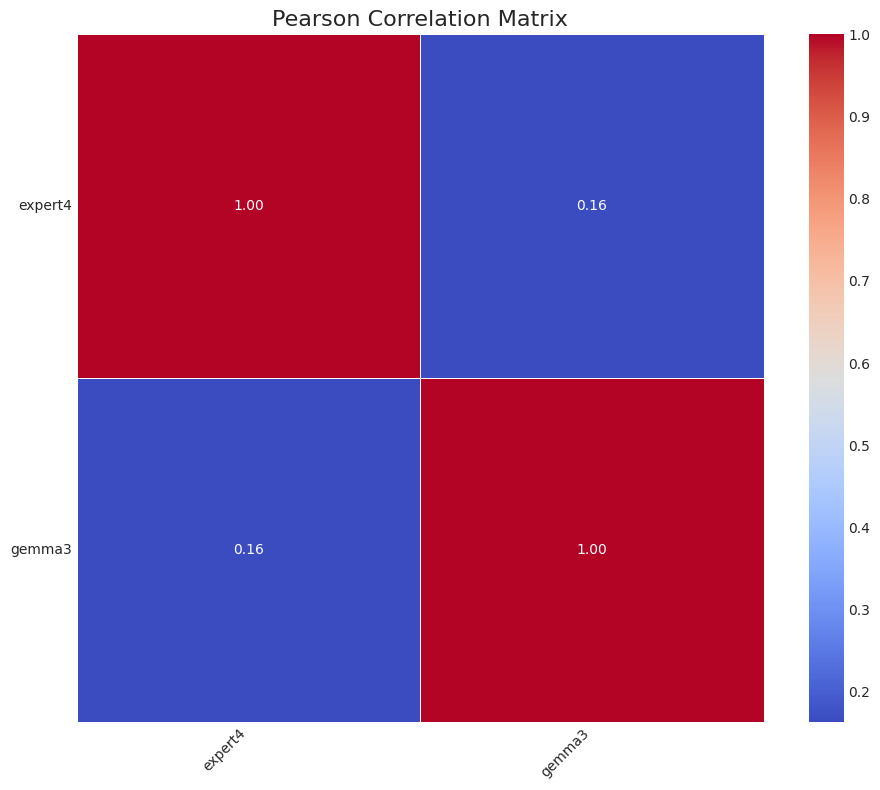

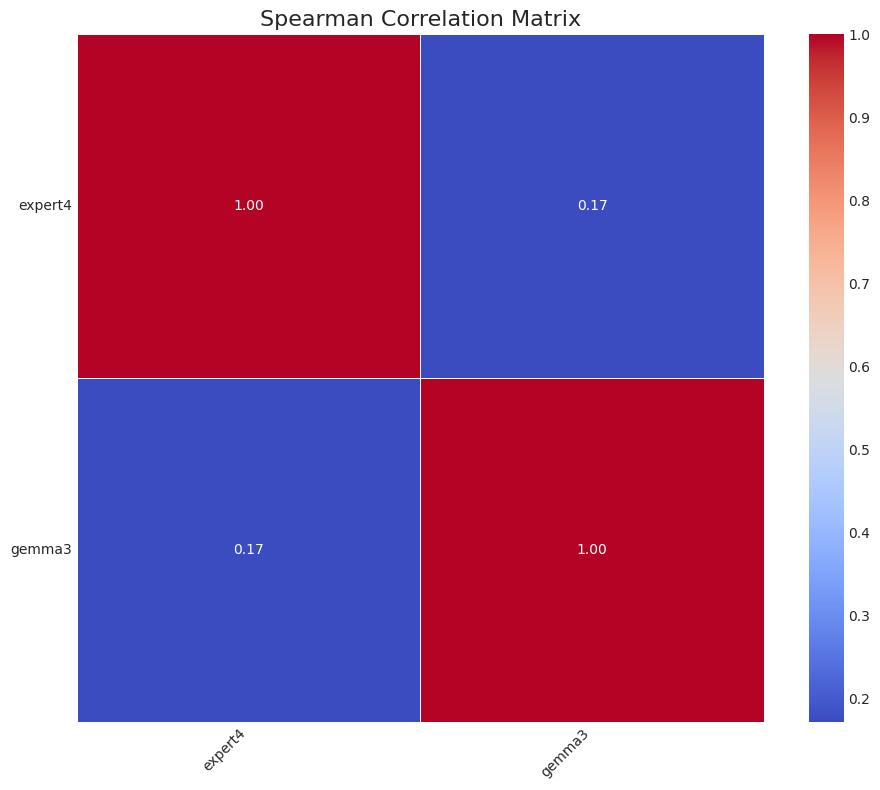

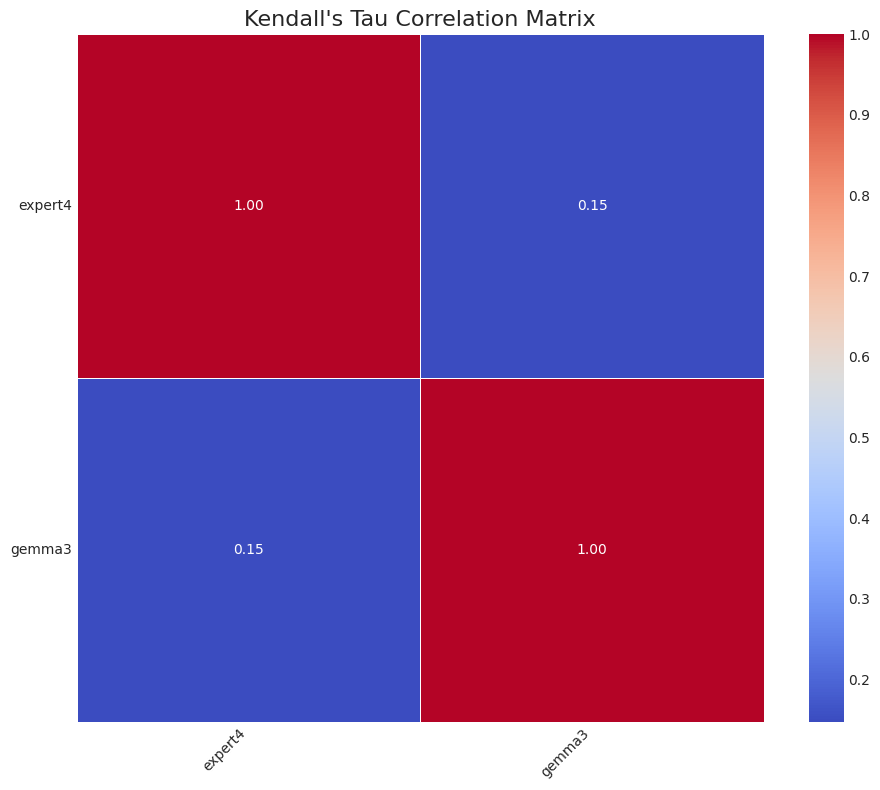

Correlation matrix visualizations (Pearson, Spearman, and Kendall's Tau) generated!


In [128]:
correlations_heatmap(df_exp4_gemma3,'81args_correlation_exp_g3')

In [139]:
def correlations_heatmap(df,filename):

    # Define the columns of interest
    columns_of_interest = ['expert4', 'gemma3', 'llama', 'deepseek']

    # Ensure the DataFrame only contains the columns of interest
    df_selected = df[columns_of_interest]

    print("--- Selected DataFrame Columns (head)---")
    print(df_selected.head())
    print("\n" + "="*50 + "\n")

    # Calculate correlation matrices directly using pandas .corr() method
    # This is efficient for generating full correlation matrices.

    pearson_matrix = df_selected.corr(method='pearson')
    spearman_matrix = df_selected.corr(method='spearman')
    kendall_matrix = df_selected.corr(method='kendall') # Calculate Kendall's Tau matrix

    print("--- Pearson Correlation Matrix ---")
    print(pearson_matrix)
    print("\n" + "="*50 + "\n")

    print("--- Spearman Correlation Matrix ---")
    print(spearman_matrix)
    print("\n" + "="*50 + "\n")

    print("--- Kendall's Tau Correlation Matrix ---")
    print(kendall_matrix)
    print("\n" + "="*50 + "\n")


    # Visualize the correlation matrices as heatmaps

    # Plotting configuration
   # plt.style.use('seaborn-v0_8-darkgrid') # Visual style
    plt.style.use('seaborn-v0_8-darkgrid')
    plt.rcParams['figure.figsize'] = (10, 8) # Default figure size
    plt.rcParams['font.size'] = 10 # Default font size

    # --- Heatmap for Pearson Correlation ---
    plt.figure(figsize=(10, 8))
    sns.heatmap(pearson_matrix,
                annot=True,     # Show correlation values on cells
                cmap='coolwarm', # Color map (red for negative, blue for positive)
                fmt=".2f",      # Format numbers to two decimal places
                linewidths=.5,  # Lines between cells
                cbar=True,      # Show color bar
                square=True)    # Ensure cells are square

    plt.title('Pearson Correlation Matrix', fontsize=16)
    plt.xticks(rotation=45, ha='right') # Rotate X-axis labels for better readability
    plt.yticks(rotation=0)             # Keep Y-axis labels horizontal
    plt.tight_layout() # Adjust subplot parameters for a tight layout
    plt.savefig(filename+'pearson_.jpg')
    plt.show()


    # --- Heatmap for Spearman Correlation ---
    plt.figure(figsize=(10, 8))
    sns.heatmap(spearman_matrix,
                annot=True,
                cmap='coolwarm',
                fmt=".2f",
                linewidths=.5,
                cbar=True,
                square=True)

    plt.title('Spearman Correlation Matrix', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(filename+'spearman.jpg')
    plt.show()


    # --- Heatmap for Kendall's Tau Correlation ---
    plt.figure(figsize=(10, 8)) # Create a new figure for Kendall's Tau
    sns.heatmap(kendall_matrix,
                annot=True,
                cmap='coolwarm',
                fmt=".2f",
                linewidths=.5,
                cbar=True,
                square=True)

    plt.title("Kendall's Tau Correlation Matrix", fontsize=16) # Title for Kendall's plot
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(filename+'kendall.jpg')
    plt.show()

    print("Correlation matrix visualizations (Pearson, Spearman, and Kendall's Tau) generated!")

### judge llama

In [130]:
judge_ll = pd.read_csv('../judge/judge_llama_81args_all.csv')

In [131]:
judge_ll

,Unnamed: 0,topic,response,prompt,timestamp,duration,scores,comments,jll_g01_score1,jll_g01_score2,...,jll_llVSg_0s_score1,jll_llVSg_0s_score2,jll_gVSds_1s_score1,jll_gVSds_1s_score2,jll_dsVSll_1s_score1,jll_dsVSll_1s_score2,jll_llVSg_1s_score1,jll_llVSg_1s_score2,jll_g01_score1.1,jll_g01_score2.1
0,0,2216,Here's the evaluation of the arguments in JSON...,\nThe goal of this task is to evaluate the qu...,2025-07-03 06:20:53.893638,15.431608,"[4, 3]","['This argument is well-structured, but it cou...",4,3,...,4,3,4,5,4,3,4,3,4,3
1,1,40,Here is the evaluation of the arguments in JSO...,\nThe goal of this task is to evaluate the qu...,2025-07-03 06:21:09.912809,14.012328,"[4, 3]",['This argument is well-structured and logical...,4,3,...,0,0,4,3,4,3,3,2,4,3
2,2,2227,Here's how you can solve this problem using Py...,\nThe goal of this task is to evaluate the qu...,2025-07-03 06:22:15.549946,63.631688,Could not extract valid JSON from the input 2,NO TEXT,0,0,...,0,0,5,3,0,0,5,2,0,0
3,3,48,Here's how you can solve this problem using Py...,\nThe goal of this task is to evaluate the qu...,2025-07-03 06:23:08.460426,50.904844,[],[],0,0,...,4,2,4,3,4,3,0,0,0,0
4,4,154,"Here is the output in JSON format:\n\n{\n ""sc...",\nThe goal of this task is to evaluate the qu...,2025-07-03 06:23:22.142467,11.676384,"[4, 3]",['This argument is well-structured and logical...,4,3,...,2,4,0,0,4,3,4,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,76,1732,Here's how you can solve this problem using Py...,\nThe goal of this task is to evaluate the qu...,2025-07-03 07:06:47.403281,75.848656,Could not extract valid JSON from the input 2,NO TEXT,0,0,...,2,4,0,0,0,0,0,0,0,0
77,77,1233,Here is the evaluation of the arguments in JSO...,\nThe goal of this task is to evaluate the qu...,2025-07-03 07:07:01.493447,12.075783,"[4, 3]",['This argument is well-structured and logical...,4,3,...,4,3,4,5,4,2,4,3,4,3
78,78,325,Here's the evaluation of the arguments in JSON...,\nThe goal of this task is to evaluate the qu...,2025-07-03 07:07:14.734825,11.227589,"[4, 3]",['This argument is well-structured and logical...,4,3,...,4,3,4,3,4,3,0,0,4,3
79,79,1239,Here is the evaluation of the arguments in JSO...,\nThe goal of this task is to evaluate the qu...,2025-07-03 07:07:27.839619,11.089174,"[4, 3]",['This argument is well-structured and logical...,4,3,...,0,0,4,3,4,3,4,5,4,3


In [132]:
ll_result = extract_interleaved_pattern(judge_ll, start_col=8, end_col=25, rows_per_pair=9)

In [134]:
judge_ds = pd.read_csv('../judge/judge_deepseek_81args_all.csv')

In [135]:
ds_result = extract_interleaved_pattern(judge_ds, start_col=8, end_col=25, rows_per_pair=9)

In [136]:
data = {
    'document_id': range(1, 163),
    'expert4': translator,
    'gemma3' : g3_result ,
    'llama' : ll_result,
    'deepseek' : ds_result
}
df_exp4_all = pd.DataFrame(data)

--- Selected DataFrame Columns (head)---
   expert4  gemma3  llama  deepseek
0      4.0       4      4         0
1      4.0       4      3         0
2      4.0       4      4         4
3      5.0       3      3         3
4      4.0       5      0         0


--- Pearson Correlation Matrix ---
           expert4    gemma3     llama  deepseek
expert4   1.000000  0.163812  0.058689  0.082426
gemma3    0.163812  1.000000  0.128294  0.002788
llama     0.058689  0.128294  1.000000  0.056681
deepseek  0.082426  0.002788  0.056681  1.000000


--- Spearman Correlation Matrix ---
           expert4    gemma3     llama  deepseek
expert4   1.000000  0.172307  0.078256  0.079291
gemma3    0.172307  1.000000  0.174278  0.010242
llama     0.078256  0.174278  1.000000  0.053323
deepseek  0.079291  0.010242  0.053323  1.000000


--- Kendall's Tau Correlation Matrix ---
           expert4    gemma3     llama  deepseek
expert4   1.000000  0.147851  0.066006  0.068326
gemma3    0.147851  1.000000  0.16761

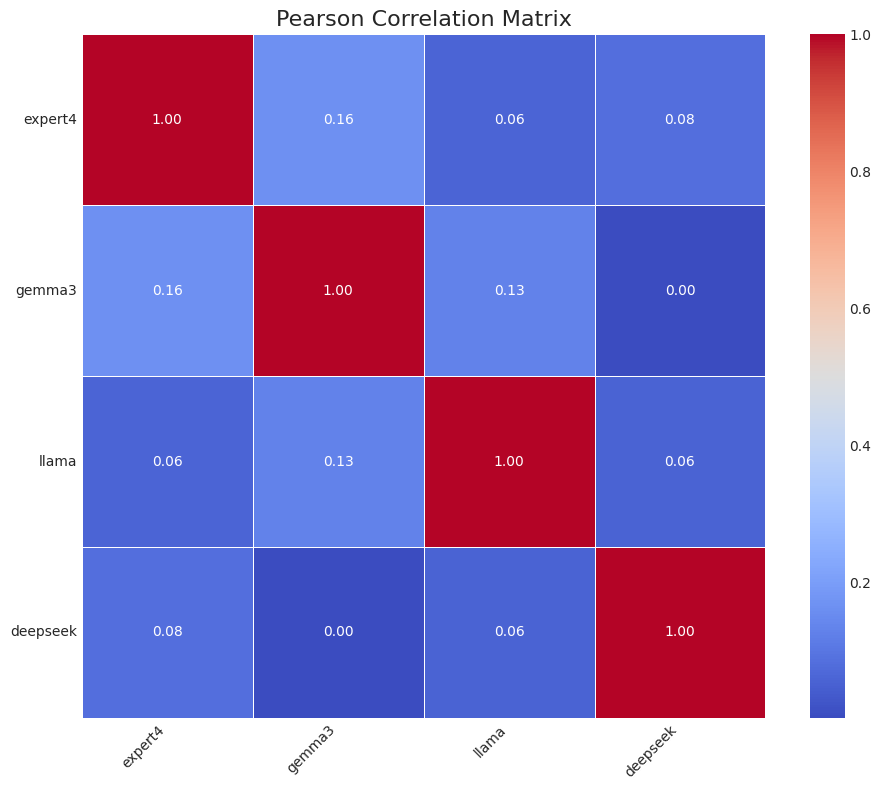

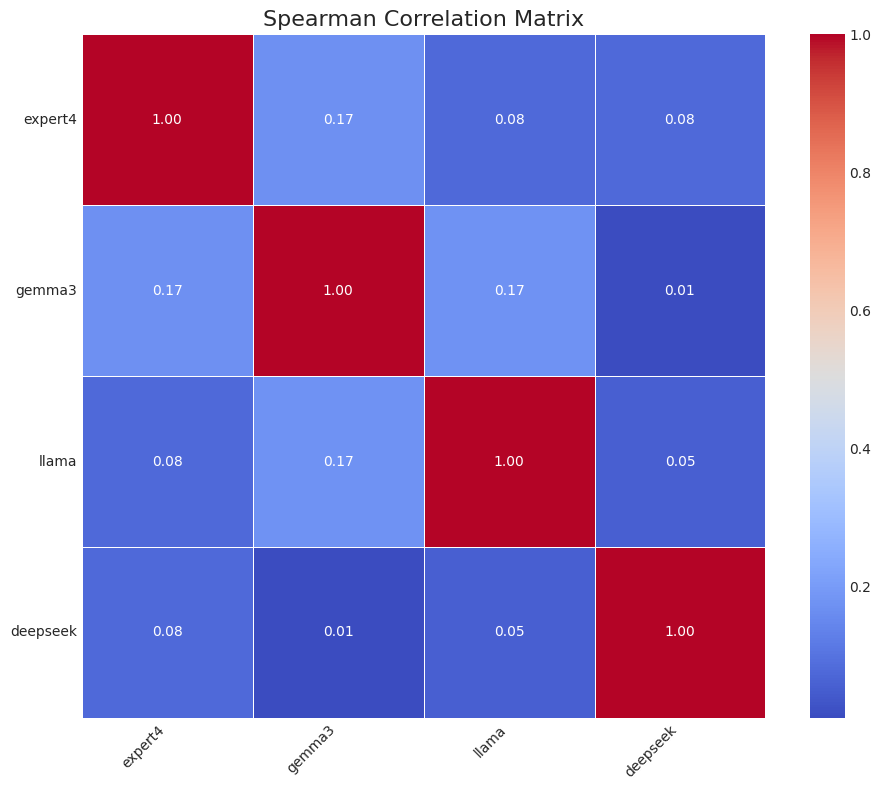

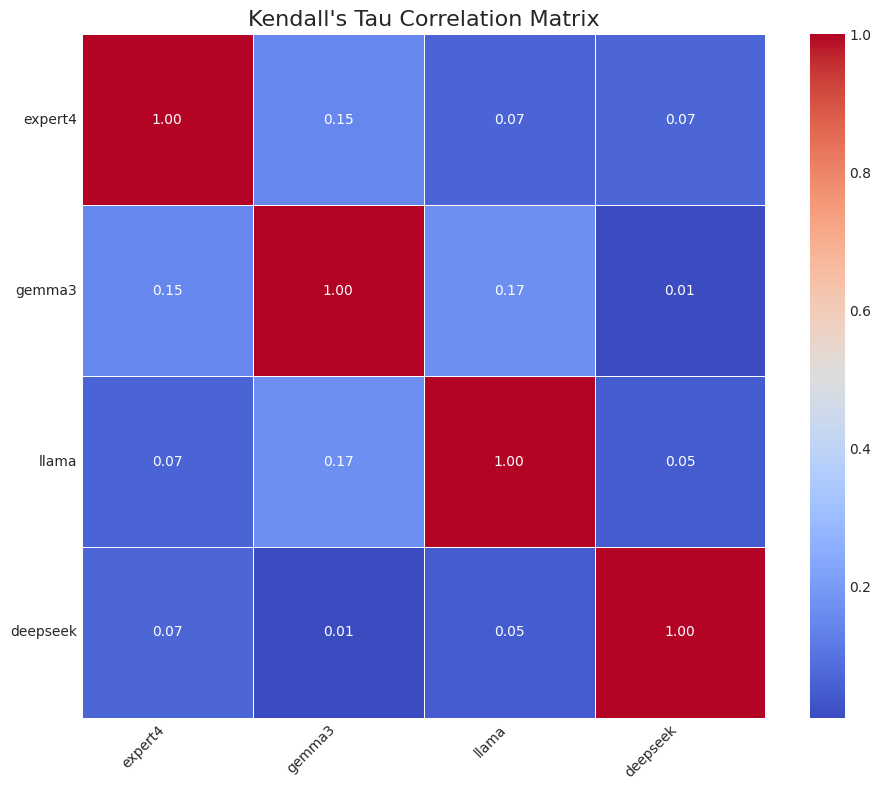

Correlation matrix visualizations (Pearson, Spearman, and Kendall's Tau) generated!


In [140]:
correlations_heatmap(df_exp4_all,'81args_correlation_exp_all')

In [144]:
# drop rows that has a value not in the range 1 to 5
# 
def filter_columns_range(df, columns, min_val, max_val):
    """
    Filter DataFrame to keep only rows where specified columns 
    have values within the given range.
    
    Args:
        df: DataFrame to filter
        columns: List of column names to check
        min_val: Minimum allowed value (inclusive)
        max_val: Maximum allowed value (inclusive)
    
    Returns:
        Filtered DataFrame
    """
    condition = True
    for col in columns:
        if col in df.columns:
            condition = condition & (df[col] >= min_val) & (df[col] <= max_val)
        else:
            print(f"Warning: Column '{col}' not found in DataFrame")
    
    return df[condition]

df_filtered4 = filter_columns_range(df_exp4_all, ['gemma3', 'deepseek', 'llama'], 1, 5)

print("\nMethod 4 - Function approach:")
print(df_filtered4)
print(f"Filtered shape: {df_filtered4.shape}")
#condition = True
## Show which rows were dropped
#dropped_rows = df_exp4_all[~condition]
#print("\nDropped rows:")
#print(dropped_rows)


Method 4 - Function approach:
     document_id  expert4  gemma3  llama  deepseek
2              3      4.0       4      4         4
3              4      5.0       3      3         3
8              9      5.0       3      4         5
9             10      4.0       3      3         4
16            17      4.0       4      4         4
..           ...      ...     ...    ...       ...
155          156      4.0       2      3         5
158          159      4.0       4      4         4
159          160      5.0       4      5         5
160          161      5.0       4      4         4
161          162      5.0       4      3         5

[70 rows x 5 columns]
Filtered shape: (70, 5)


In [ ]:
df_filtered4

--- Selected DataFrame Columns (head)---
    expert4  gemma3  llama  deepseek
2       4.0       4      4         4
3       5.0       3      3         3
8       5.0       3      4         5
9       4.0       3      3         4
16      4.0       4      4         4


--- Pearson Correlation Matrix ---
           expert4    gemma3     llama  deepseek
expert4   1.000000  0.105938  0.248750  0.030493
gemma3    0.105938  1.000000  0.660943  0.272033
llama     0.248750  0.660943  1.000000  0.165589
deepseek  0.030493  0.272033  0.165589  1.000000


--- Spearman Correlation Matrix ---
           expert4    gemma3     llama  deepseek
expert4   1.000000  0.132236  0.199702  0.080096
gemma3    0.132236  1.000000  0.649664  0.219672
llama     0.199702  0.649664  1.000000  0.169482
deepseek  0.080096  0.219672  0.169482  1.000000


--- Kendall's Tau Correlation Matrix ---
           expert4    gemma3     llama  deepseek
expert4   1.000000  0.118497  0.180002  0.070893
gemma3    0.118497  1.000000  0

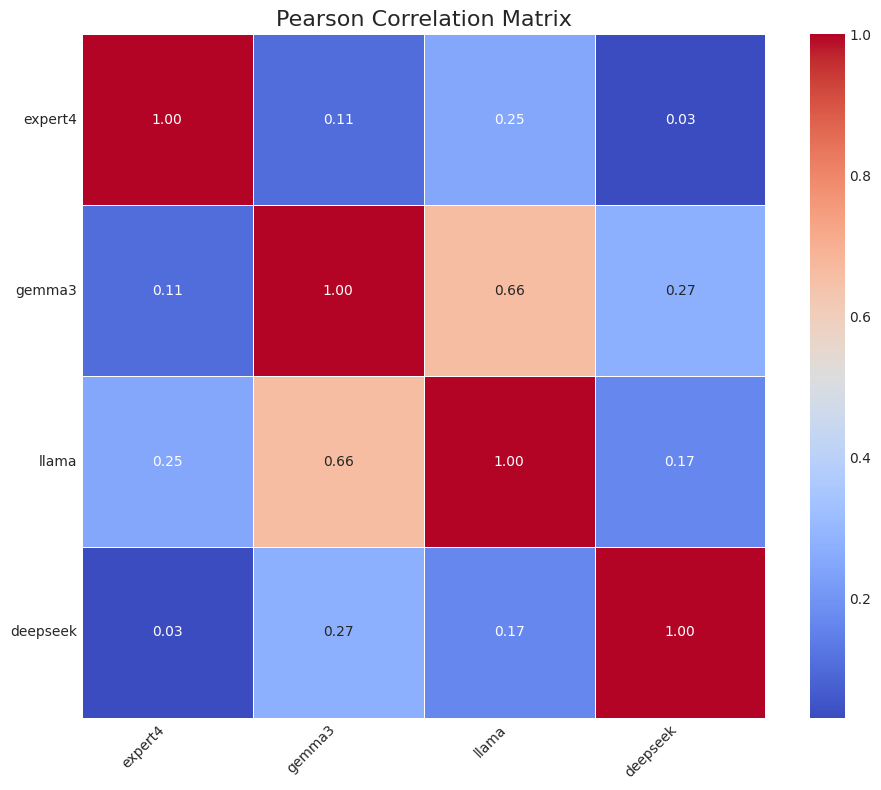

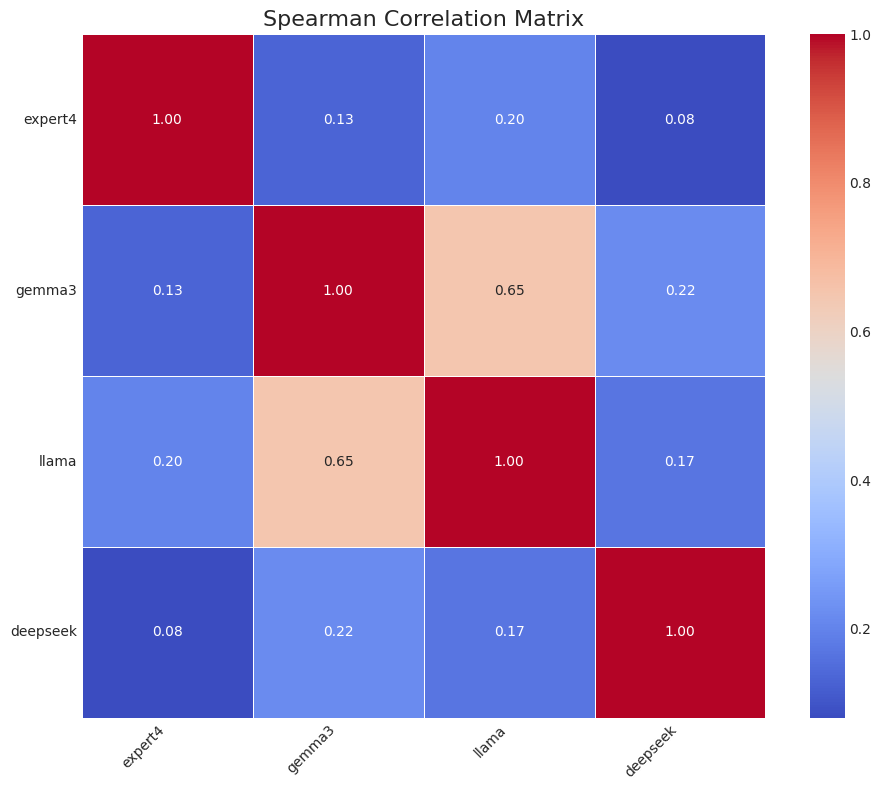

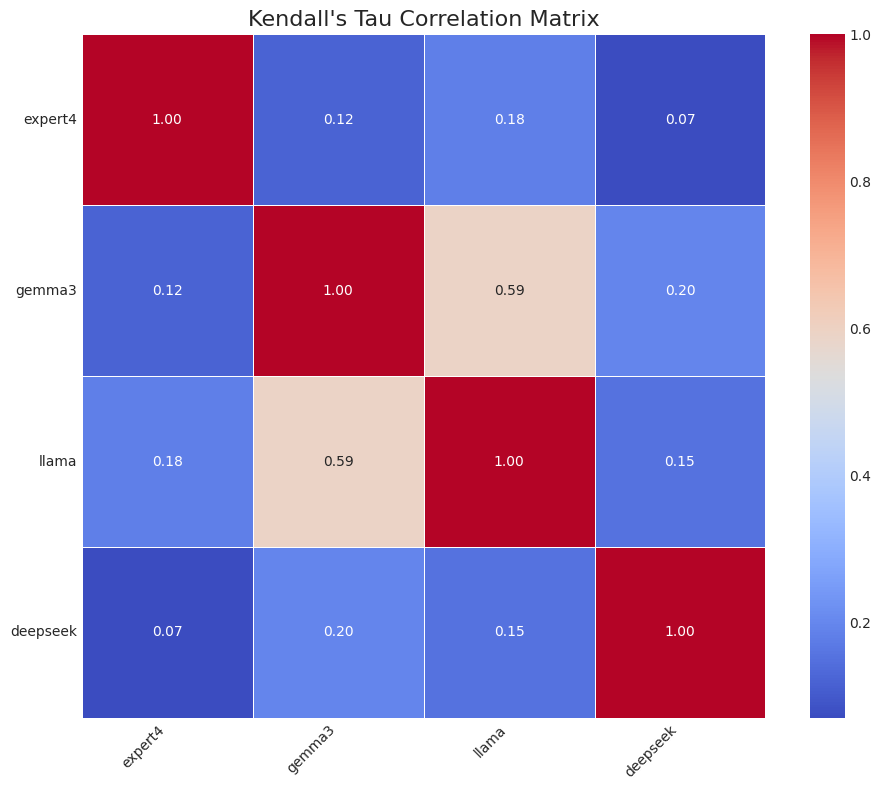

Correlation matrix visualizations (Pearson, Spearman, and Kendall's Tau) generated!


In [145]:
correlations_heatmap(df_filtered4,'70args_correlation_exp_all')